# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from matplotlib import rcParams
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

# data_path = ''  #the path where you downloaded the data
df = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases (
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETR** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### checking nan-values

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

### there is nulll values in columns (credit_limit, Minumum_payments)

## checking statasics of data 

In [6]:
# This will print basic statistics for numerical columns
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

## from description of data 
### we notice that there is very difference between mean an 50% of almost all features so we notice this data will be skewed at almost af all features 

In [7]:
df.duplicated().sum()

0

#### No duplicate in this data << that is nice>>

### uniqueness values in each columns

In [8]:
# unique values in each column
for column in df.columns:
    print(f'{column}: {df[column].nunique()}')
    print('-'*30)

CUST_ID: 8950
------------------------------
BALANCE: 8871
------------------------------
BALANCE_FREQUENCY: 43
------------------------------
PURCHASES: 6203
------------------------------
ONEOFF_PURCHASES: 4014
------------------------------
INSTALLMENTS_PURCHASES: 4452
------------------------------
CASH_ADVANCE: 4323
------------------------------
PURCHASES_FREQUENCY: 47
------------------------------
ONEOFF_PURCHASES_FREQUENCY: 47
------------------------------
PURCHASES_INSTALLMENTS_FREQUENCY: 47
------------------------------
CASH_ADVANCE_FREQUENCY: 54
------------------------------
CASH_ADVANCE_TRX: 65
------------------------------
PURCHASES_TRX: 173
------------------------------
CREDIT_LIMIT: 205
------------------------------
PAYMENTS: 8711
------------------------------
MINIMUM_PAYMENTS: 8636
------------------------------
PRC_FULL_PAYMENT: 47
------------------------------
TENURE: 7
------------------------------


### we notice there is many values and many difference in values in each columns 

In [9]:
# drop cust_id because not important and drow a boxpolt for all numeric columns to see outliers
df.drop('CUST_ID', axis=1, inplace=True)

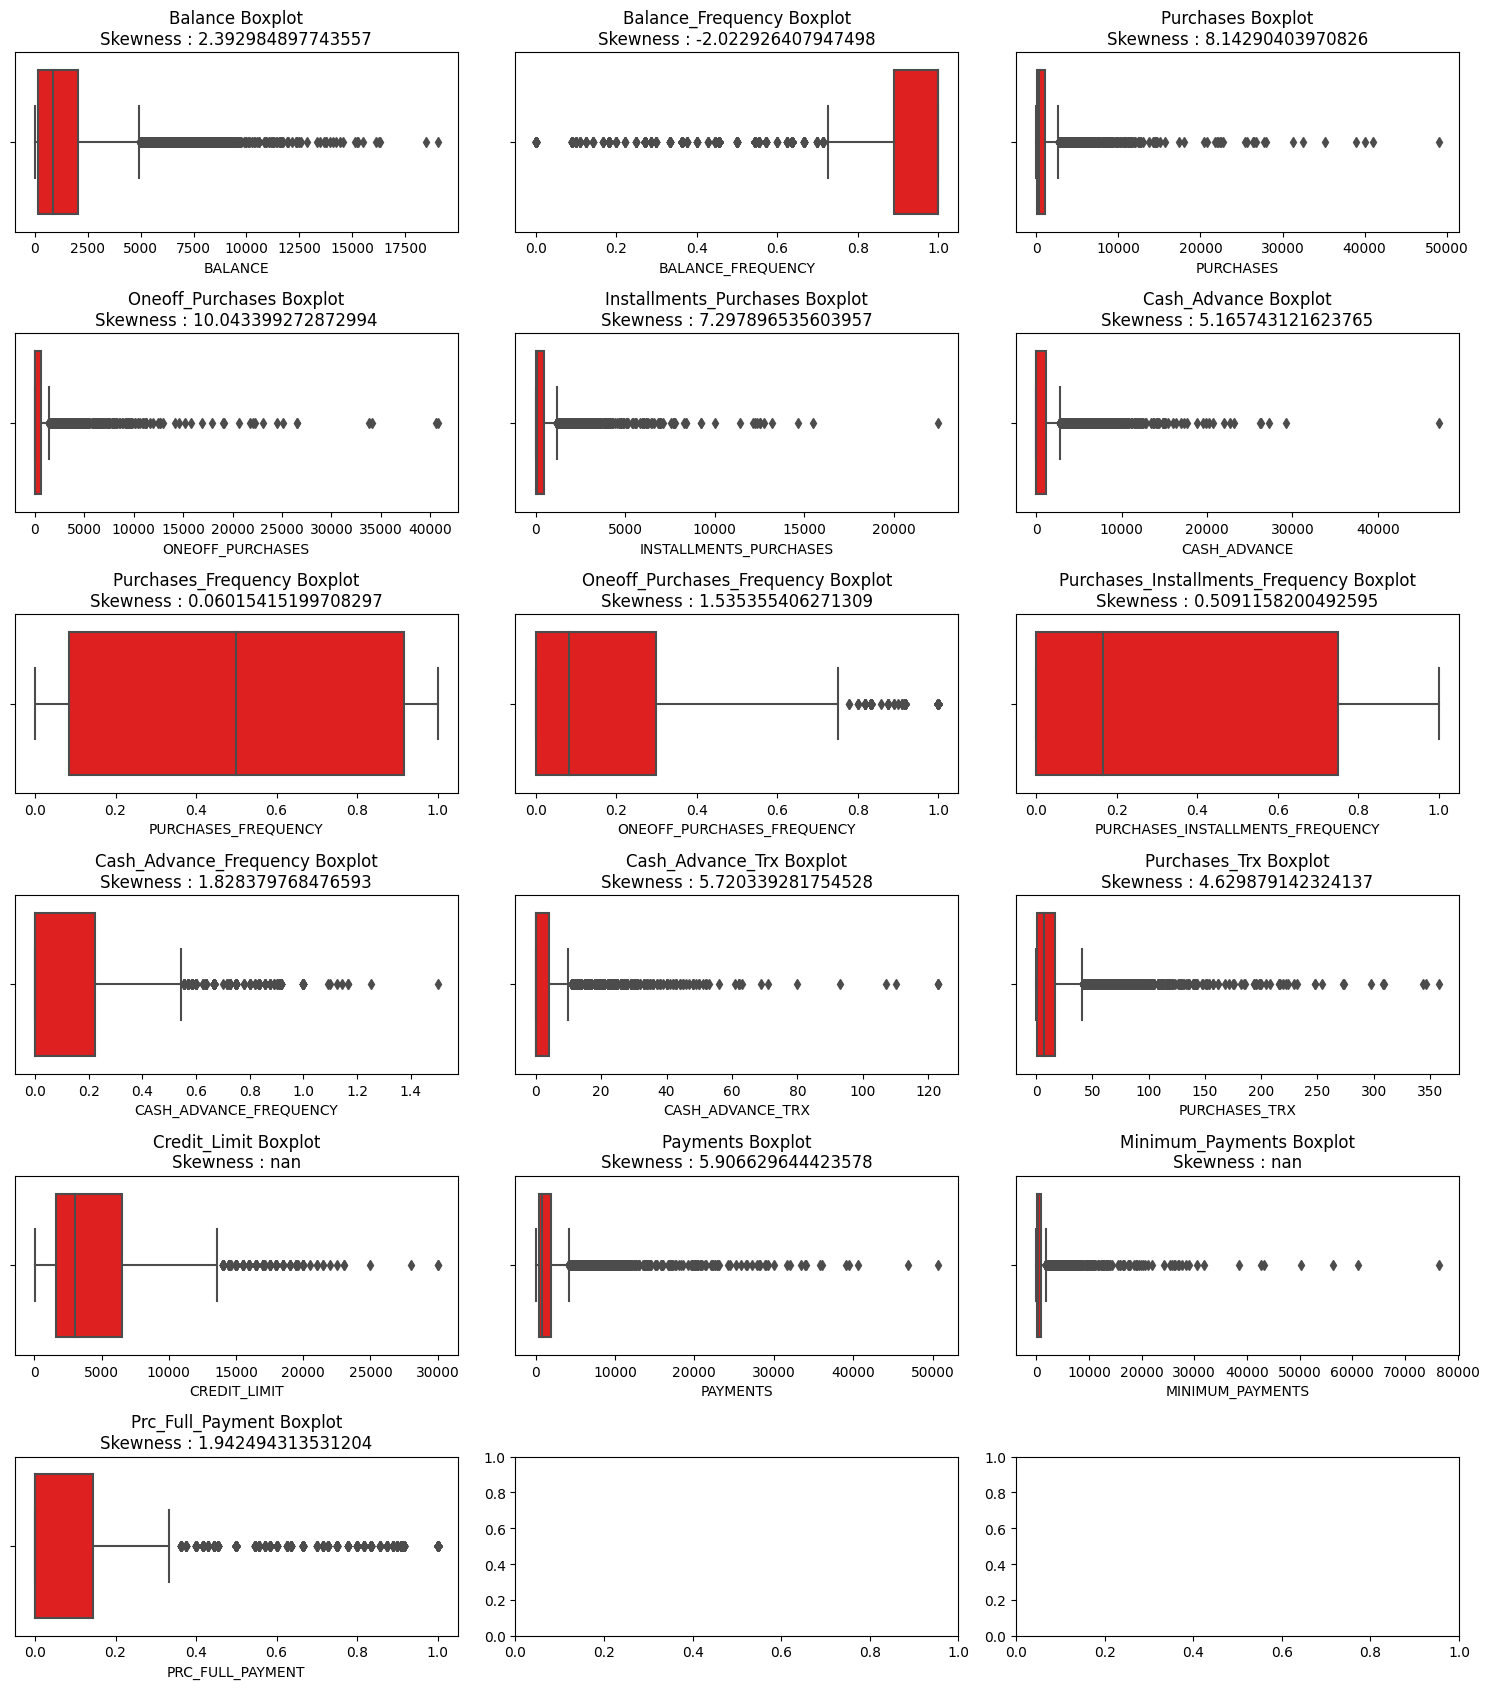

In [10]:
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 
# df[column] = pd.to_numeric(df[column], errors='coerce')
def Distrubtion_of_data(dataframe,columns):
    fig, ax = plt.subplots(6, 3, figsize=(15,17));
    ax = ax.ravel();
    for i,column in enumerate(columns_of_interest):
#         plt.figure(figsize = (30,5));
        skewness_value = skew(dataframe[column], bias=True);
        plt.sca(ax[i]);
        sns.boxplot(data=dataframe, x=column, color='red');
        plt.title(f'{column.title()} Boxplot\nSkewness : {skewness_value}', fontsize=12);

    plt.tight_layout();
#         #gce (get current axes)
#         plt.gca().set(xlabel=column, ylabel='Density');
#         sns.boxplot(df[column])
#     plt.show()      
Distrubtion_of_data(df, columns_of_interest);
    

### from figures we notice there is ** outliers ** in almost all features expect 

##### 1-PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY
##### 2-We notice that ,The majority of columns  positive skewness, with only one column showing approximately normal distribution (purchased frequency), and one column displaying negative skewness (balance frequency).



In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

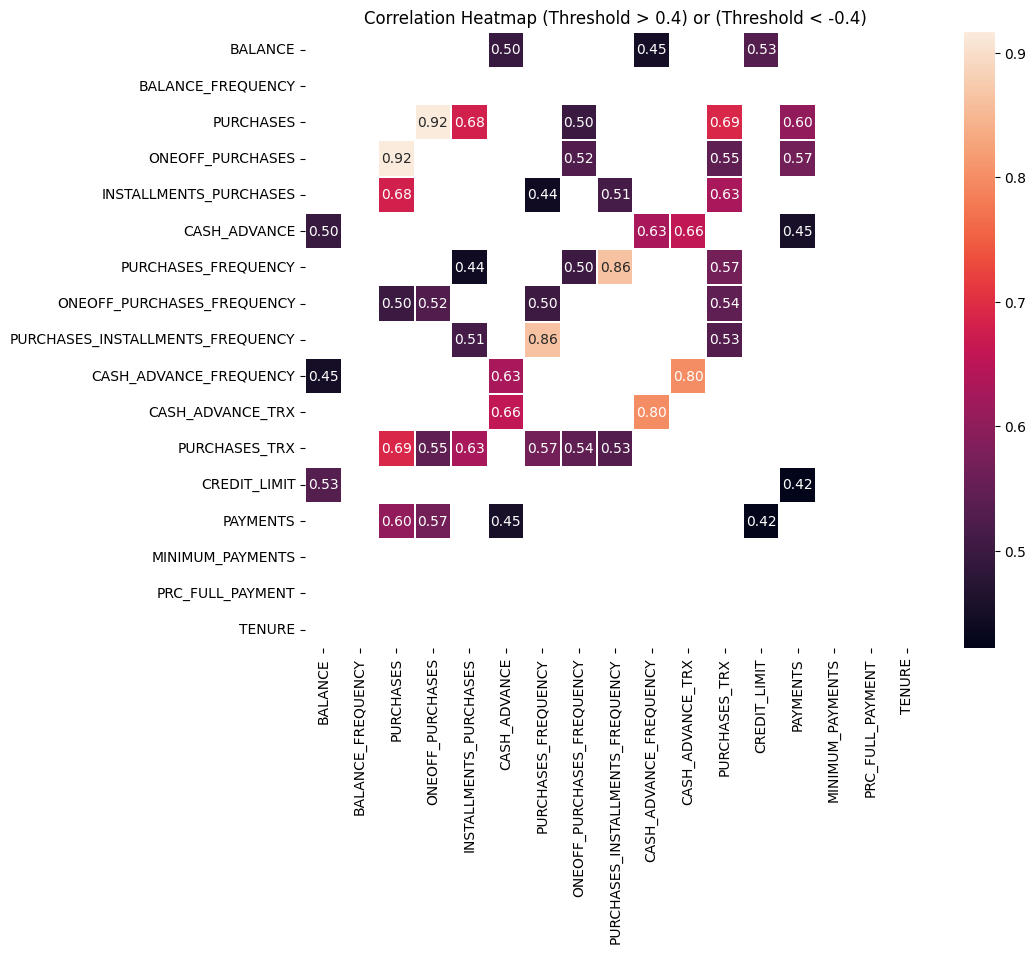

In [12]:
#check the correlation between the features
correlation = df.corr()
threshold = 0.4 
corr_filtered = correlation[((correlation > threshold) & (correlation < 1)) | (correlation < -threshold)]
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap (Threshold > 0.4) or (Threshold < -0.4)')
sns.heatmap(corr_filtered, annot=True,fmt='.2f',linewidths=0.3)
plt.show()

### we notice that there is some columns have a high correlations 
1- `PURCHASES`, `ONEOFF_PURCHASES`  0.92

2-`PURCHASES_FREQUENCY` ,`PURCHASES_INSTALLMENTS_FREQUENCY` 0.86

3-`PURCHASES_TRX` ,`CASH_ADVANCE_FREQUENCY` 0.80

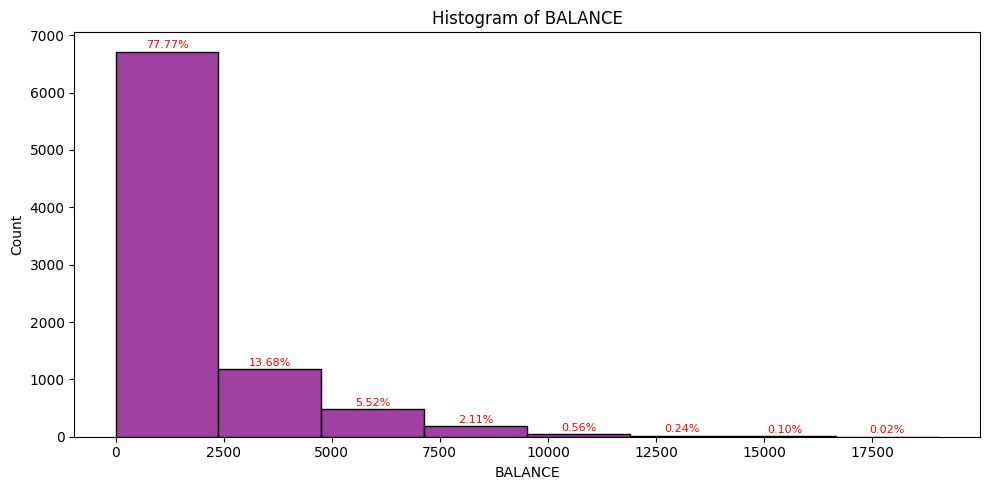

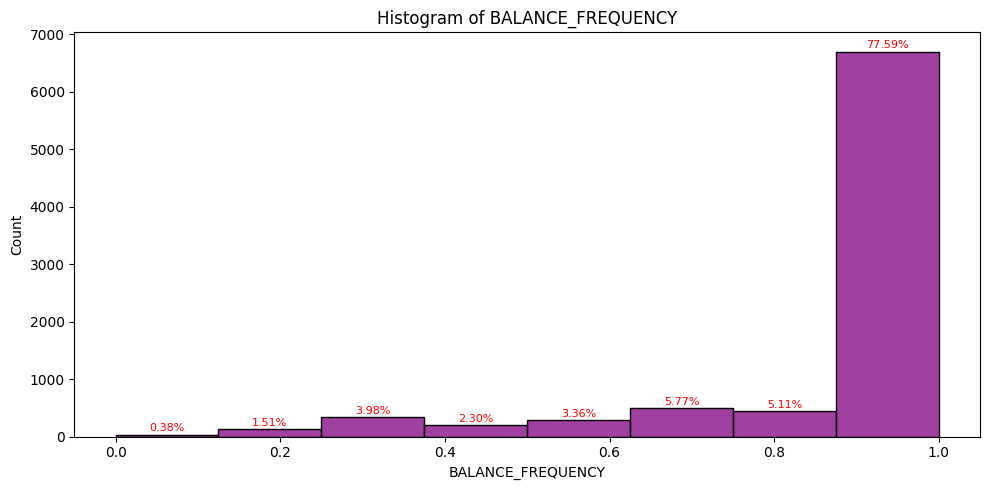

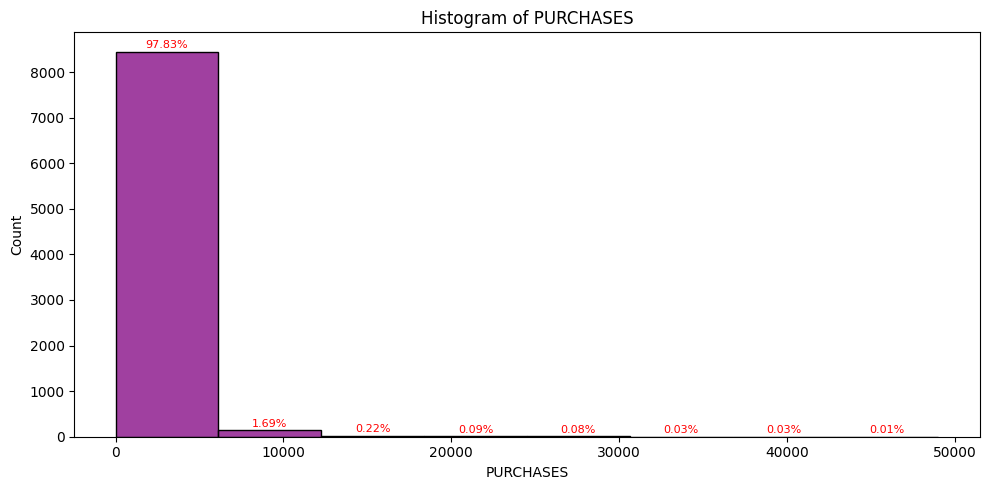

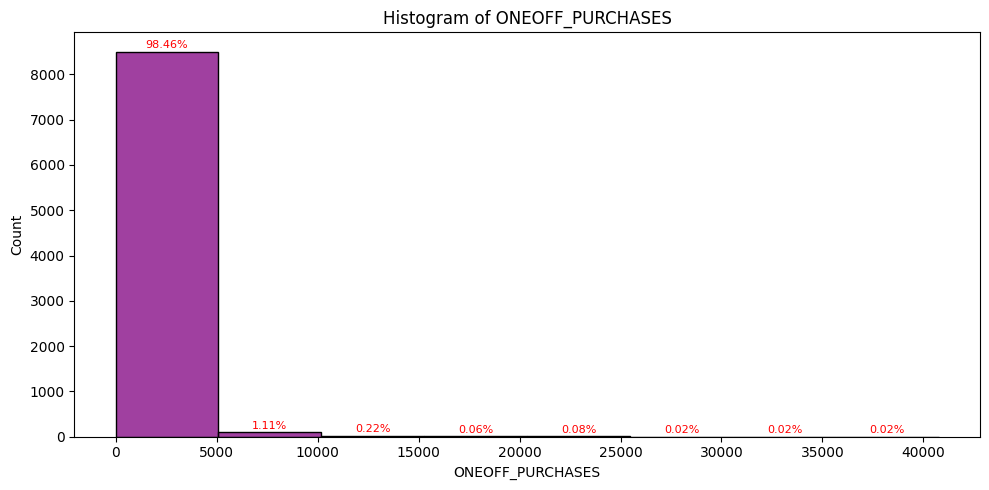

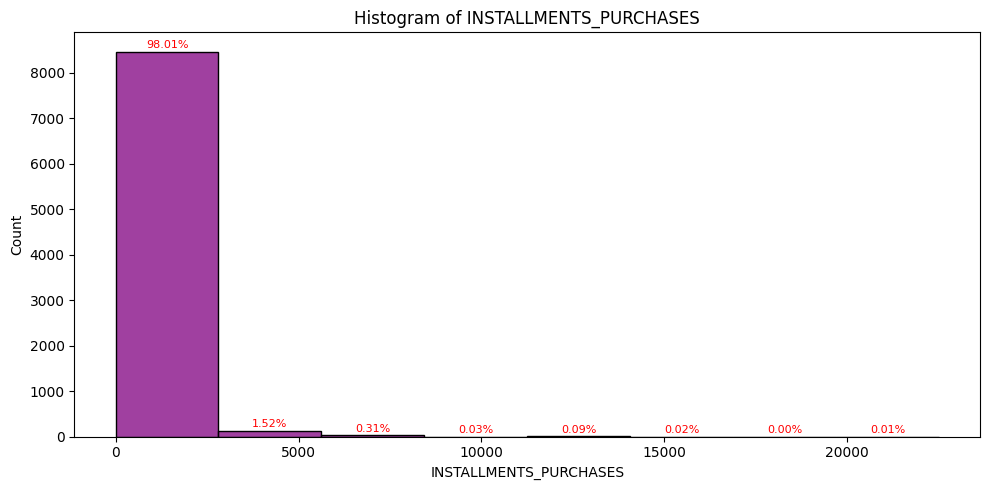

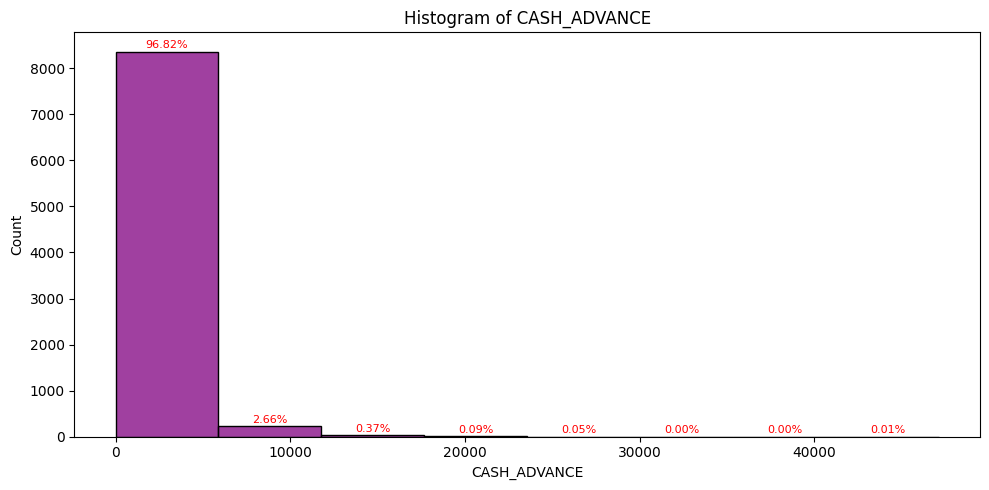

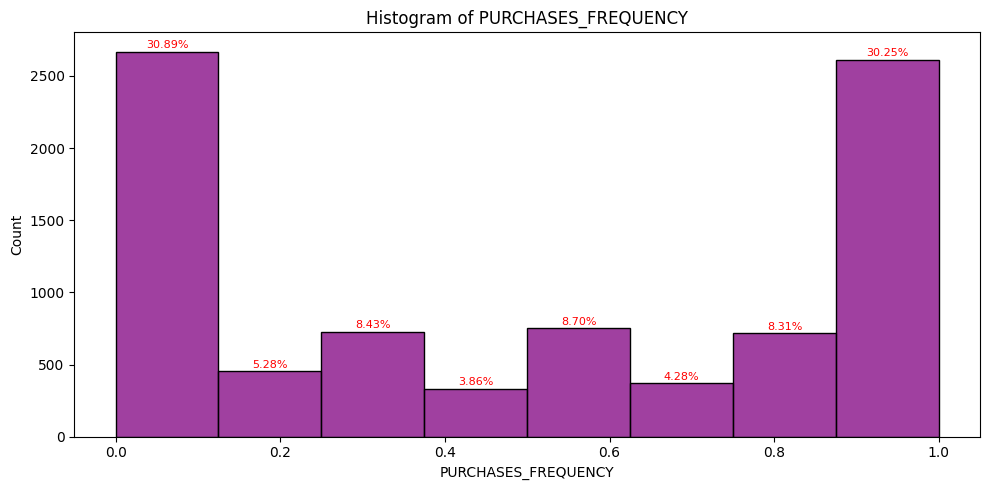

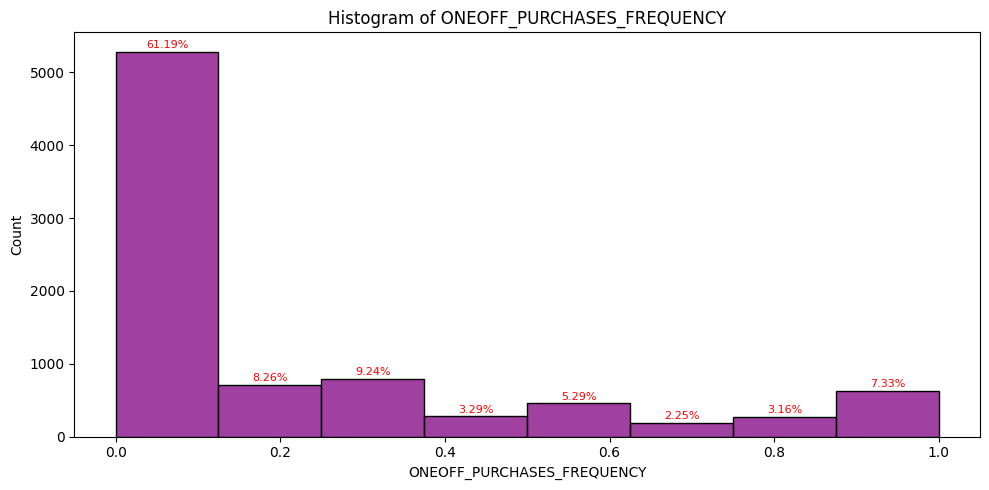

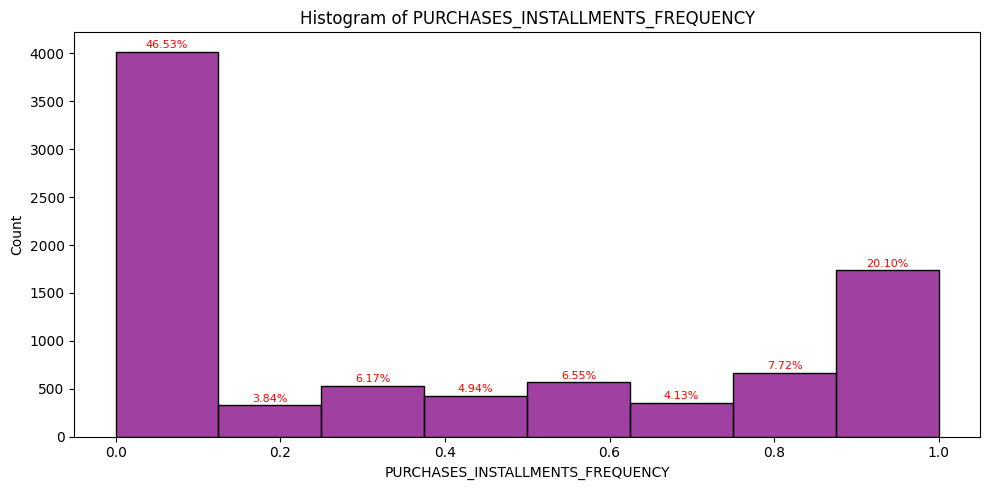

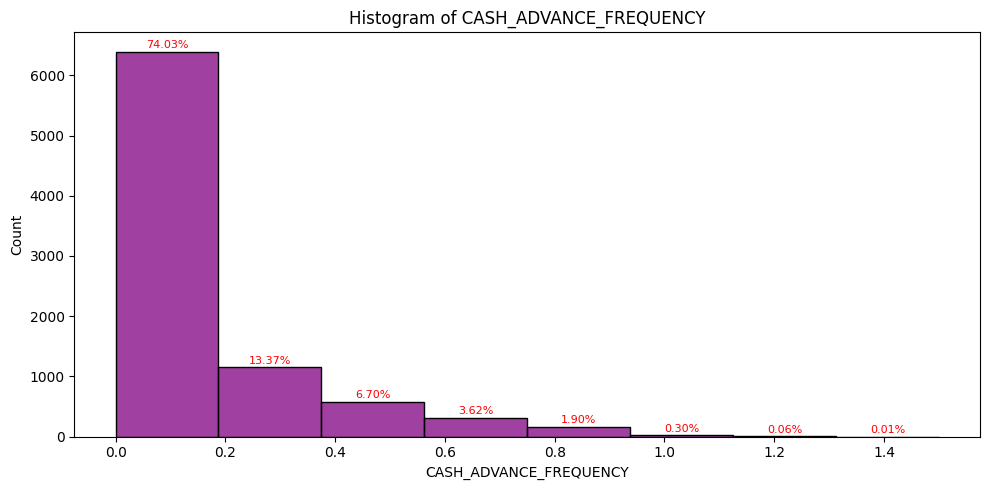

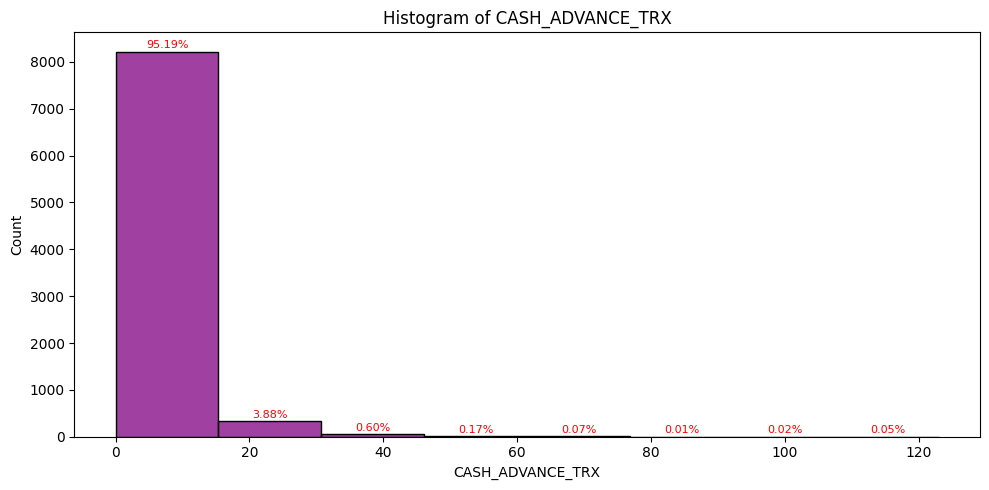

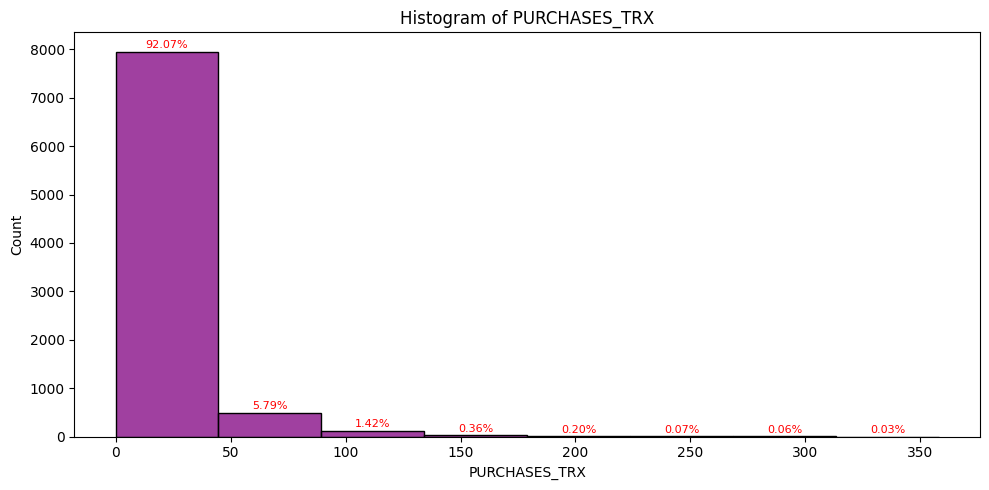

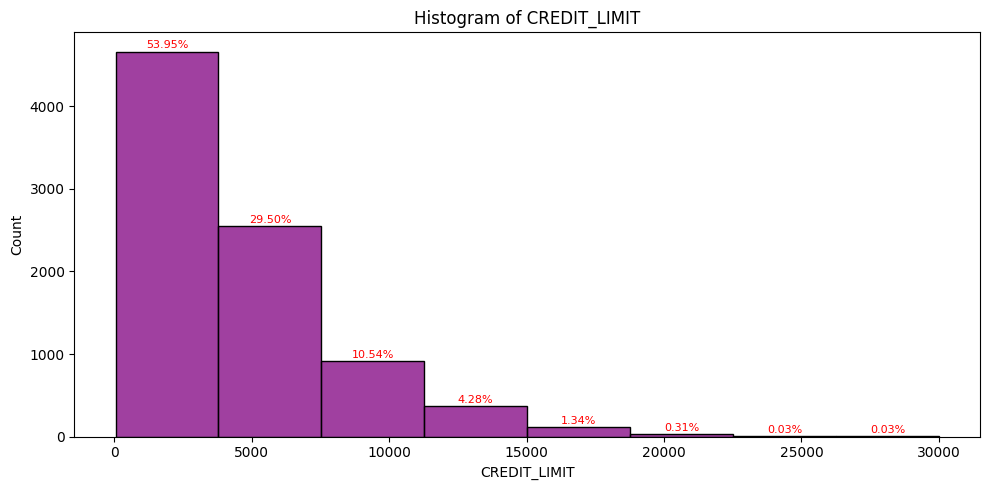

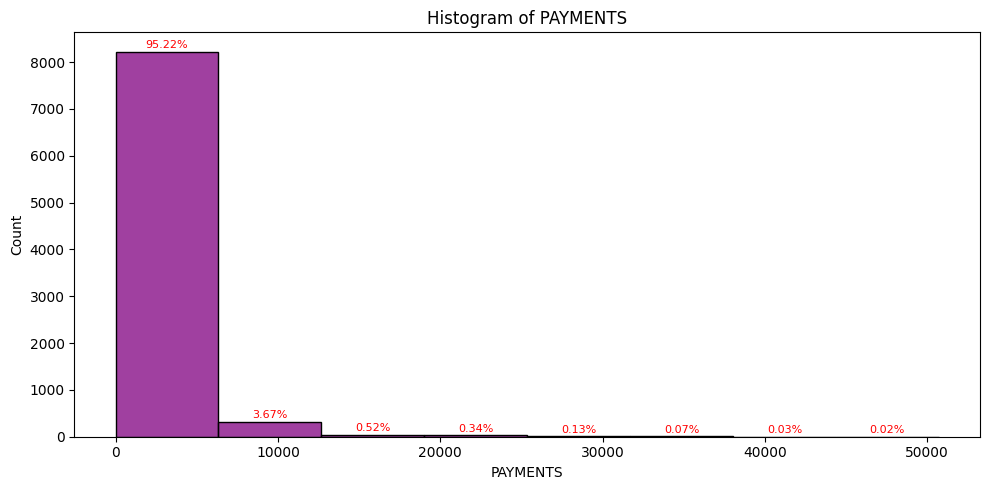

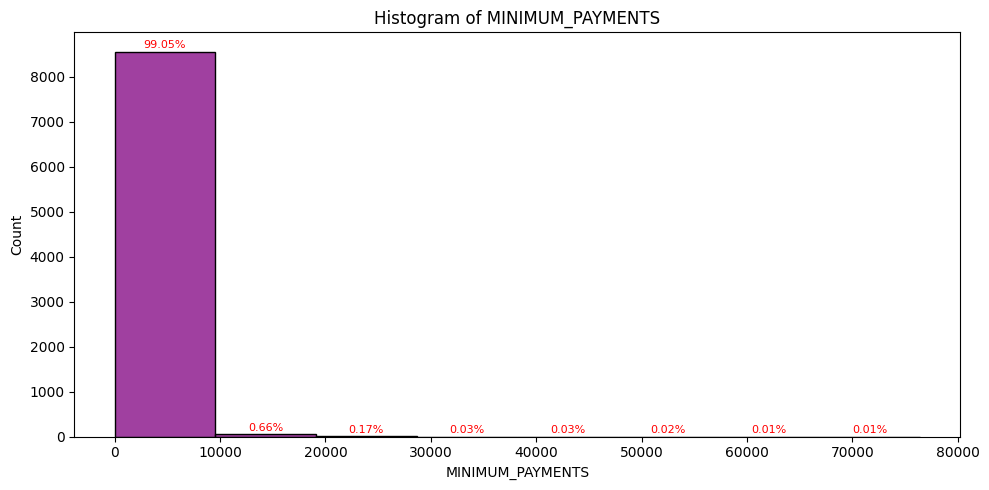

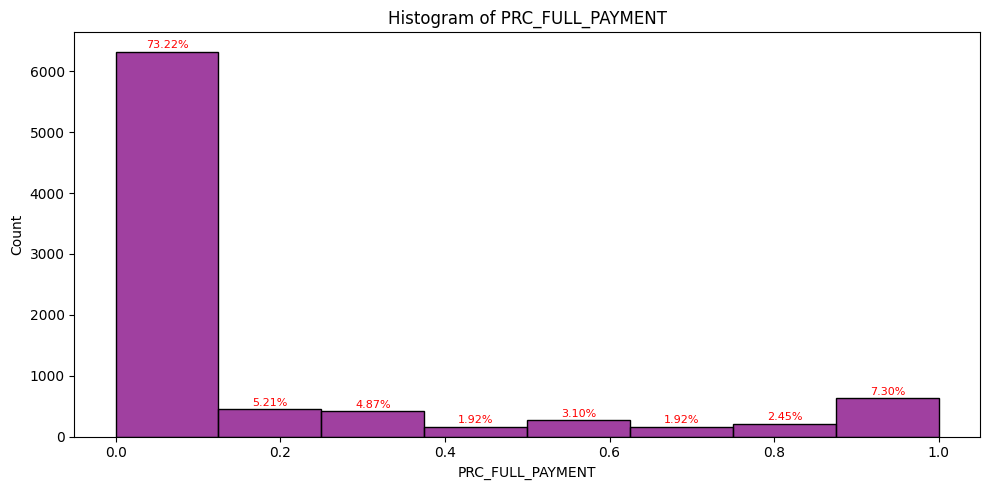

In [13]:
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 
selected_data = df[columns_of_interest].dropna()

# Plot histograms for each selected column individually
for column in columns_of_interest:
    plt.figure(figsize=(10, 5))
    sns.histplot(selected_data[column], bins=8, color='purple', edgecolor='black')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {column}')

    # Calculate the percentage of data points in each bin
    counts, bins = np.histogram(selected_data[column], bins=8)
    percentages = (counts / len(selected_data[column])) * 100

    # Annotate each bin with the percentage value
    for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
        plt.annotate(f'{percentage:.2f}%', xy=(bin_edge + np.diff(bins)[0] / 2, count), xytext=(0, 1),
                     textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

    plt.tight_layout()
    plt.show()

In [14]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## Insights from the prevoius plots of data 
#### 1- Account balance 
 **77.77%** of customers mantain account balance not exceeding 2300$ so most of customer prefer spending money.
 
 
 
#### 2- Balance Freguency 
 **77.58%** Most of customers updated their account balance so they always use it and activate their credit card frequently
 
 
 
#### 3- Purchers 
 **97.83%** most of customers  make pruchers  
 
 
 
#### 4-**Most customers 98\%**   prefer purchases made in installments, with the majority opting for purchases under $5000, indicating a preference for budget-friendly spending and manageable repayment plans.



#### 5-Purchase Frequency
 **30.8%** of customers make pruchers frequently,**30** not make purchers frequently and the other between them vary from customer to another.
 
 
 
#### 6- ONEOFF_PURCHASES_FREQUENCY
 **61.19%** not prefer make purcheres in on_go
 
 
 
#### 7- PURCHASES_INSTALLMENTS_FREQUENCY
 **46.5%** not prefer purchers installments but about **27.5** prefer purchers installments
 
 
 
#### 8- CASH_ADVANCE_FREQUENCY
 **85% and more** not prefer cash-frequency so they avoid this method of payment 



#### 9- CASH_ADVANCE_TRX ,PURCHASES_TRX
 **92.07** made a number of purchers so they prefer make most frequences 
 
 
 
#### 10- CREDIT_LIMIT
 **more than 54.9%** have a limit in credit cards not excedding 4000$ so it is good to be intermediate credit card limit 
 
 
 
#### 11- payment_Behaviour: The total amount of money paid towards the credit card balance.
 **95.22** of customers save their credit card active because they pay for it 
 
 
 
#### 12- MINIMUM_PAYMENTS :The minimum amount required to be paid each billing cycle to avoid late fees.
 **99%** of customers avoid late fees
 
 
 
#### 13- PRC_FULL_PAYMENT :The percentage of times a customer pays the full balance due each month
 **more that 73.2%** of customers not prefer pay full balance due each month

 

 
 

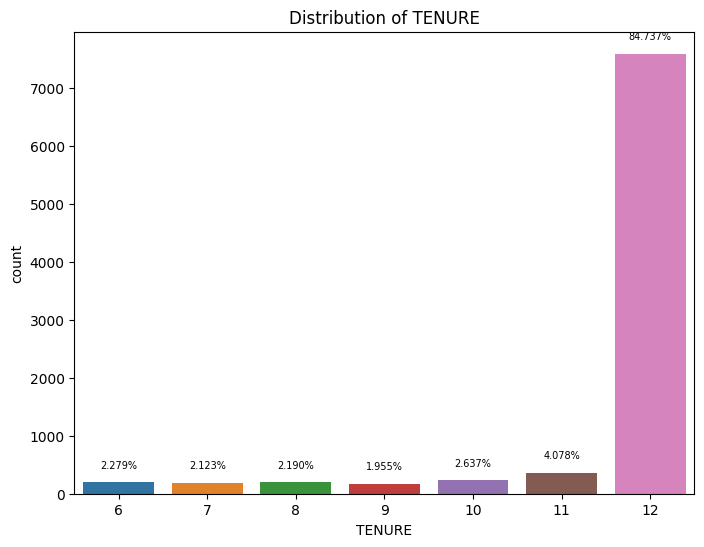

In [15]:
# Plot countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='TENURE')

# Calculate percentages
total = len(df['TENURE'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.3%}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center', 
                fontsize=7)

plt.title('Distribution of TENURE')
plt.show()

### 84.7 % of customers has a service 12 monthes of credit card

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-     outliers      <br>
2-          skewed <br>
3-          null values <br>

In [59]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue** nan values

In [60]:
#solution
df_copy = df_copy.dropna()

In [61]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

#### we don't have now nan values

In [154]:
# Apply TSNE to just visualize data and see the effect 
from sklearn.manifold import TSNE
def TSNE_2D(df,perplexity=40, learning_rate=0.1, n_iter=1000,hue=None):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(df)
    tsne_2d_one = tsne_results[:,0]
    tsne_2d_two = tsne_results[:,1]
    sns.scatterplot(
      x=tsne_2d_one, y=tsne_2d_two,
     legend="full",
     hue=hue,
     palette='tab10'
      )
    plt.title("TSNE");

In [155]:
# def TSNE_2D(df, perplexity=40, learning_rate=0.1, n_iter=1000, hue=None, labels=None):
#     tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter)
#     tsne_results = tsne.fit_transform(df)
#     df_tsn = pd.DataFrame(tsne_results, columns=['c1', 'c2'])

#     # Plotting
#     plt.figure(figsize=(8, 6))
#     if hue is not None and labels is not None:
#         df_tsn[hue] = labels
#         sns.scatterplot(x='c1', y='c2', hue=hue, data=df_tsn, palette='tab10', legend='full')
#     else:
#         sns.scatterplot(x='c1', y='c2', data=df_tsn, palette='tab10')

#     plt.title("t-SNE Visualization")
#     plt.show()

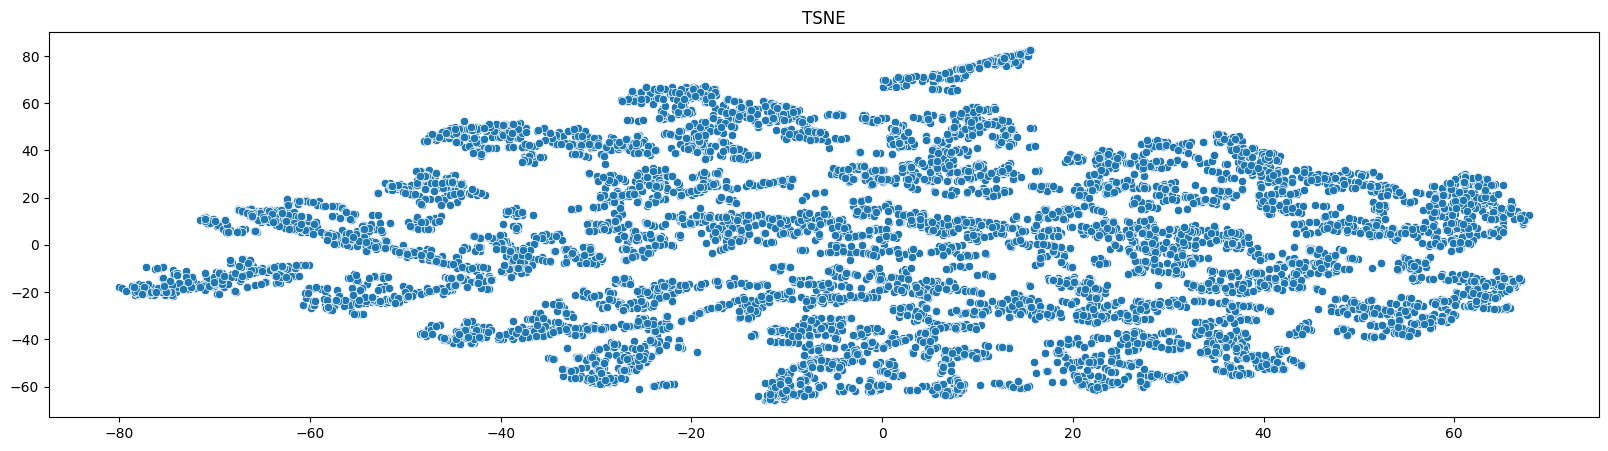

In [156]:
TSNE_2D(df_copy)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here: will make the range between of specifc columns between 0 and 1

In [114]:
from sklearn import preprocessing

**Second issue** skweness of data

In [53]:
df_copy.skew()

BALANCE                        2.374254
BALANCE_FREQUENCY             -2.084161
PURCHASES                      8.055789
INSTALLMENTS_PURCHASES         7.216133
CASH_ADVANCE                   5.139629
PURCHASES_FREQUENCY            0.033041
ONEOFF_PURCHASES_FREQUENCY     1.504234
CASH_ADVANCE_TRX               5.673327
PURCHASES_TRX                  4.578418
CREDIT_LIMIT                   1.507019
PAYMENTS                       5.873049
MINIMUM_PAYMENTS              13.622193
PRC_FULL_PAYMENT               1.886027
TENURE                        -3.011141
dtype: float64

**from above we see all data is skewed except `PURCHASES_FREQUENCY`, `BALANCE_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`,and `TENURE`** sowil apply log transform for this skewed columns

### should apply more than type of transformation and see the best result

In [54]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']

In [55]:
transformer = RobustScaler()
values = transformer.fit_transform(df_copy[skewness_features]+0.1)
values

array([[-0.44757775, -0.25394688,  0.00127027, ..., -0.26349814,
         0.        , -0.29411765],
       [ 1.1678561 , -0.34046866, -0.19577711, ...,  1.15777817,
         1.        , -0.41176471],
       [ 0.80644467,  0.36074777, -0.19577711, ...,  0.47968415,
         0.        ,  0.29411765],
       ...,
       [-0.45652061, -0.20950697,  0.1024791 , ..., -0.3504836 ,
         0.        , -0.11764706],
       [-0.46160012, -0.34046866, -0.19577711, ..., -0.3911074 ,
         0.5       , -0.41176471],
       [-0.2780375 ,  0.65104014, -0.19577711, ..., -0.34153907,
         0.5       ,  0.94117647]])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.013s...
[t-SNE] Computed neighbors for 8636 samples in 0.734s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 256.094366
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.820328
[t-SNE] KL divergence after 1000 iterations: 1.169945


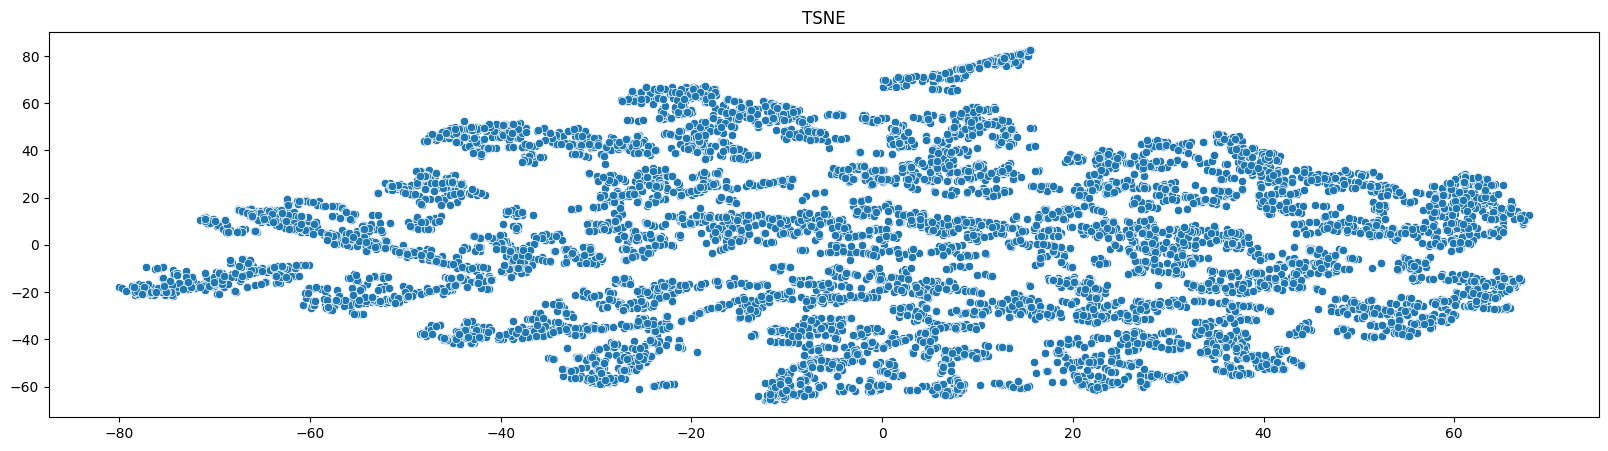

In [56]:
TSNE_2D(df_copy)

#### I feel there is no difference will apply log  I think it will be 5 clusters

In [64]:
df_copy.drop(columns=[ 'PURCHASES_INSTALLMENTS_FREQUENCY','ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

#### drop non importanat features

In [65]:
df_copy_log = np.log(df_copy + 0.1)

In [66]:
df_copy_log

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0     3.713590          -0.085360   4.559126                4.559126   
1     8.071708           0.009050  -2.302585               -2.302585   
2     7.822144           0.095310   6.650628               -2.302585   
4     6.706635           0.095310   2.778819               -2.302585   
5     7.501043           0.095310   7.195472                7.195472   
...        ...                ...        ...                     ...   
8943  1.787034          -0.510826   3.044522               -2.302585   
8945  3.353180           0.095310   5.674079                5.674079   
8947  3.156944          -0.068993   4.973280                4.973280   
8948  2.606945          -0.068993  -2.302585               -2.302585   
8949  5.921064          -0.265703   6.997002               -2.302585   

      CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0        -2.302585            -1.321755                   -2.302585   
1         8.770757            -2.302585                   -2.302585   
2        -2.302585             0.095310                    0.095310   
4        -2.302585            -1.696451                   -1.696451   
5        -2.302585            -0.265703                   -2.302585   
...            ...                  ...                         ...   
8943     -2.302585            -1.321755                   -1.321755   
8945     -2.302585             0.095310                   -2.302585   
8947     -2.302585            -0.068993                   -2.302585   
8948      3.601653            -2.302585                   -2.302585   
8949      4.845289            -0.265703                   -0.265703   

      CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0            -2.302585       0.741937      6.907855  5.307783   
1             1.410987      -2.302585      8.853680  8.319506   
2            -2.302585       2.493205      8.922672  6.433208   
4            -2.302585       0.095310      7.090160  6.519788   
5            -2.302585       2.091864      7.495597  7.244340   
...                ...            ...           ...       ...   
8943         -2.302585       0.095310      6.214808  4.073204   
8945         -2.302585       1.808289      6.907855  5.785960   
8947         -2.302585       1.629241      6.907855  4.399016   
8948          0.741937      -2.302585      6.214808  3.963665   
8949          0.741937       3.139833      7.090160  4.147339   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0             4.938851         -2.302585  2.493205  
1             6.977692         -1.132515  2.493205  
2             6.441560         -2.302585  2.493205  
4             5.500814         -2.302585  2.493205  
5             7.786280         -2.302585  2.493205  
...                ...               ...       ...  
8943          3.774454         -2.302585  1.808289  
8945          3.891542         -0.510826  1.808289  
8947          4.413021         -1.049822  1.808289  
8948          4.022770         -1.049822  1.808289  
8949          4.481747         -2.302585  1.808289  

[8636 rows x 14 columns]

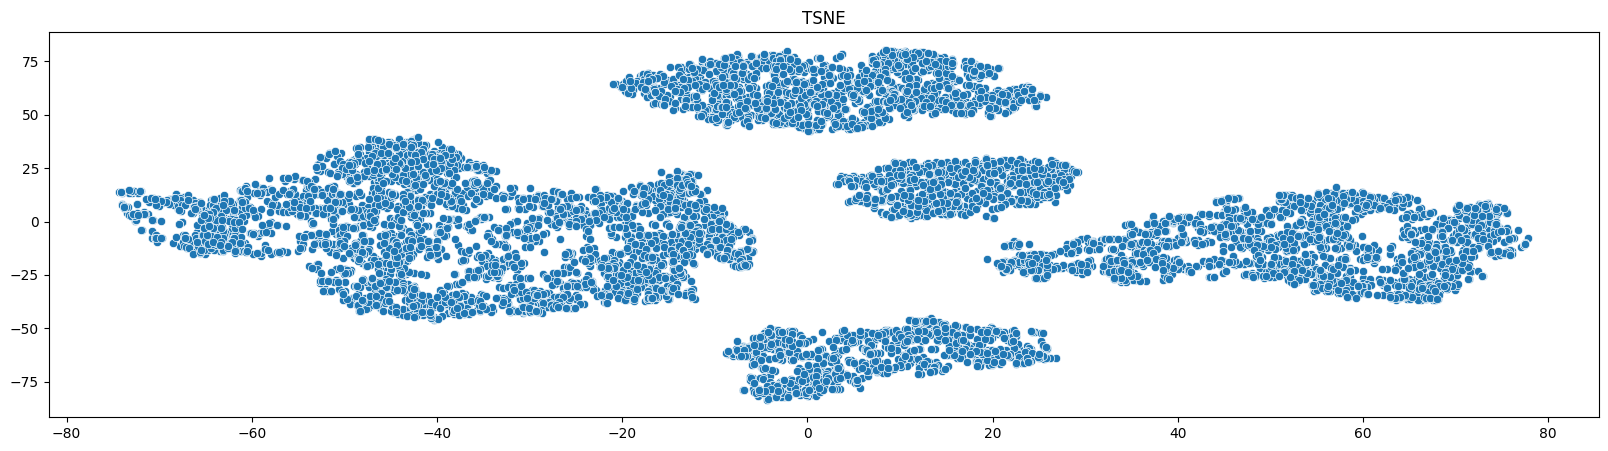

In [157]:
TSNE_2D(df_copy_log)

#### I think log is better than robust because data become closer to each other than before

In [68]:
df_copy_log.skew()

BALANCE                      -0.904675
BALANCE_FREQUENCY            -2.850055
PURCHASES                    -0.980708
INSTALLMENTS_PURCHASES       -0.140807
CASH_ADVANCE                  0.170686
PURCHASES_FREQUENCY          -0.480065
ONEOFF_PURCHASES_FREQUENCY    0.716316
CASH_ADVANCE_TRX              0.393508
PURCHASES_TRX                -0.599293
CREDIT_LIMIT                 -0.107283
PAYMENTS                     -0.109795
MINIMUM_PAYMENTS              0.101950
PRC_FULL_PAYMENT              1.250237
TENURE                       -3.272313
dtype: float64

#### I think data become less sekwed

<Figure size 2000x1000 with 0 Axes>

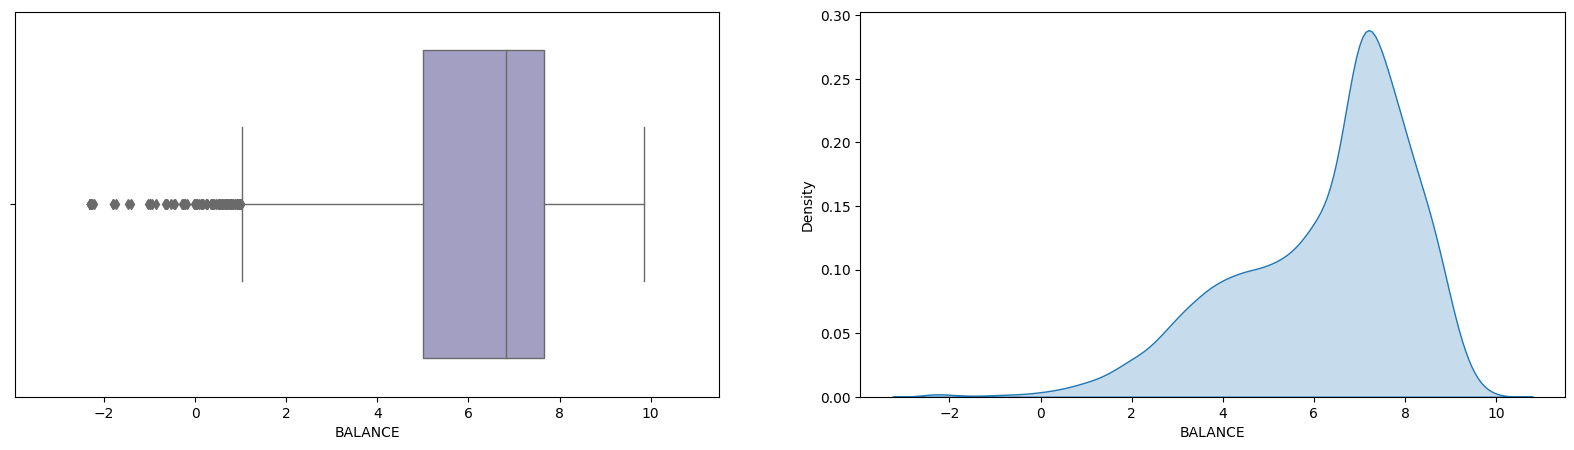

<Figure size 2000x500 with 0 Axes>

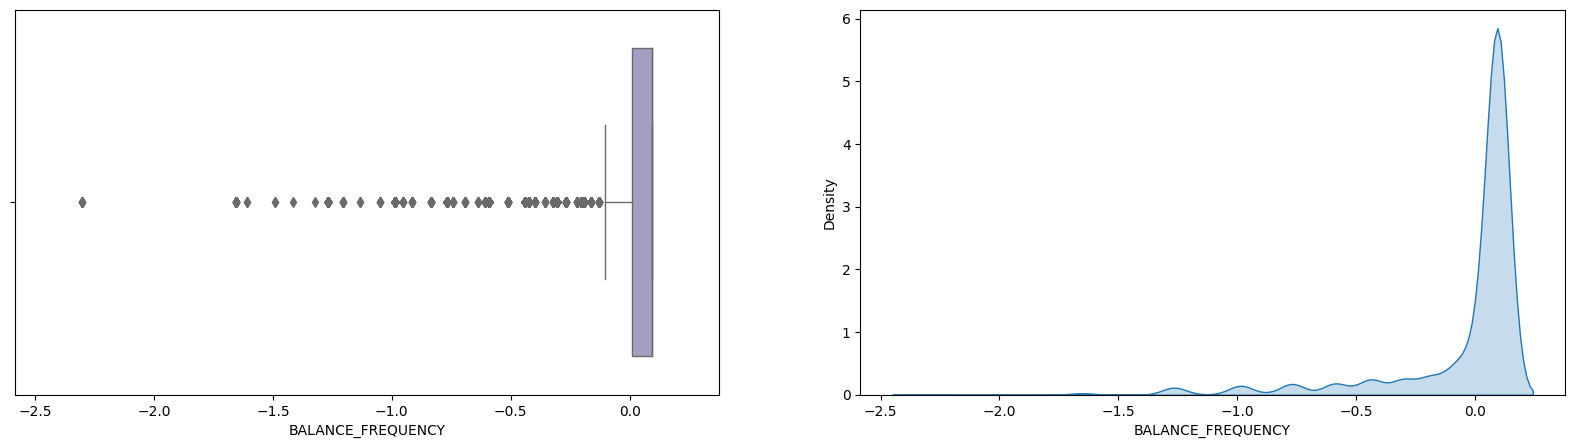

<Figure size 2000x500 with 0 Axes>

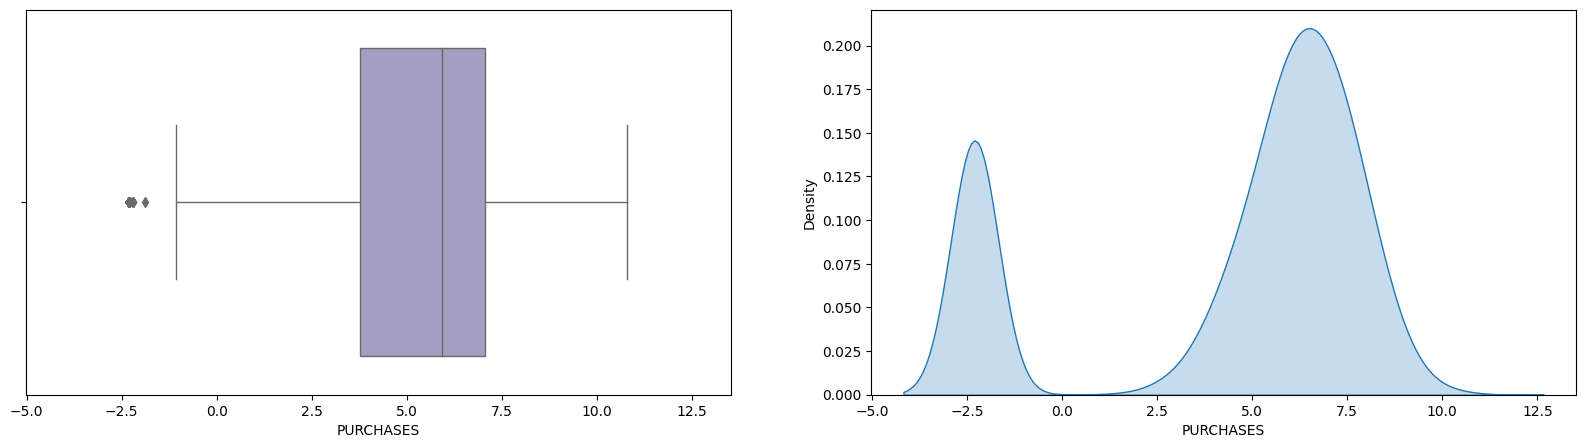

<Figure size 2000x500 with 0 Axes>

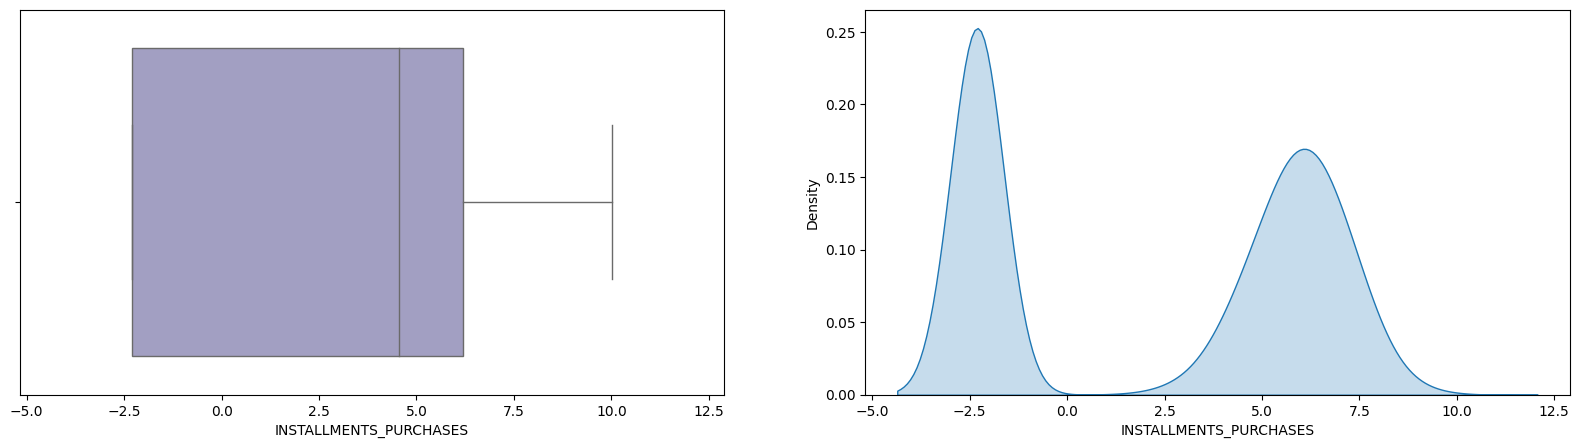

<Figure size 2000x500 with 0 Axes>

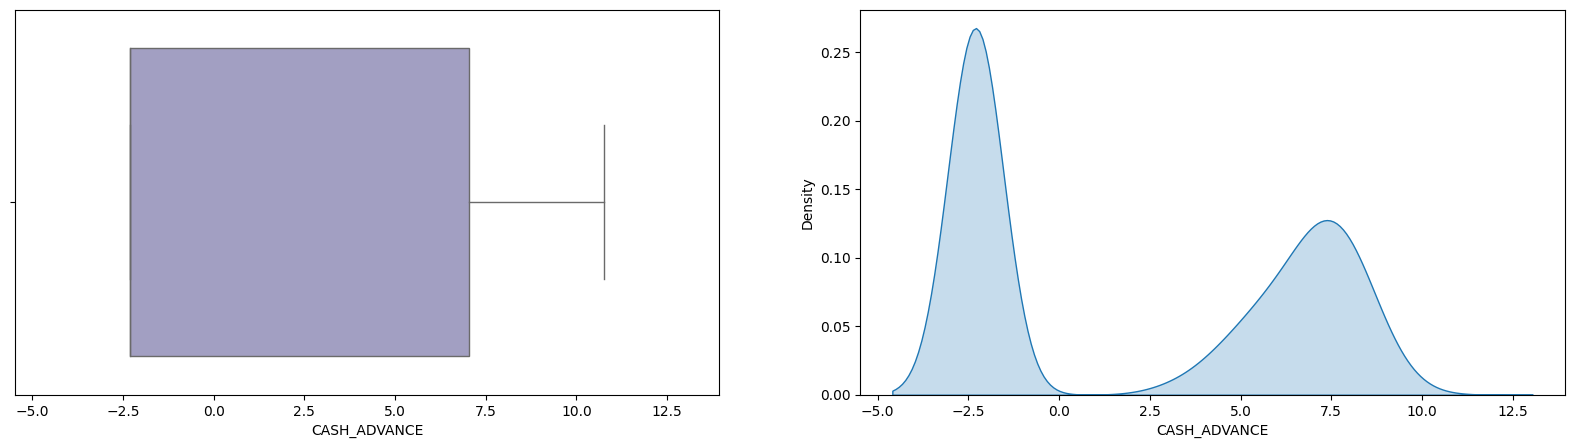

<Figure size 2000x500 with 0 Axes>

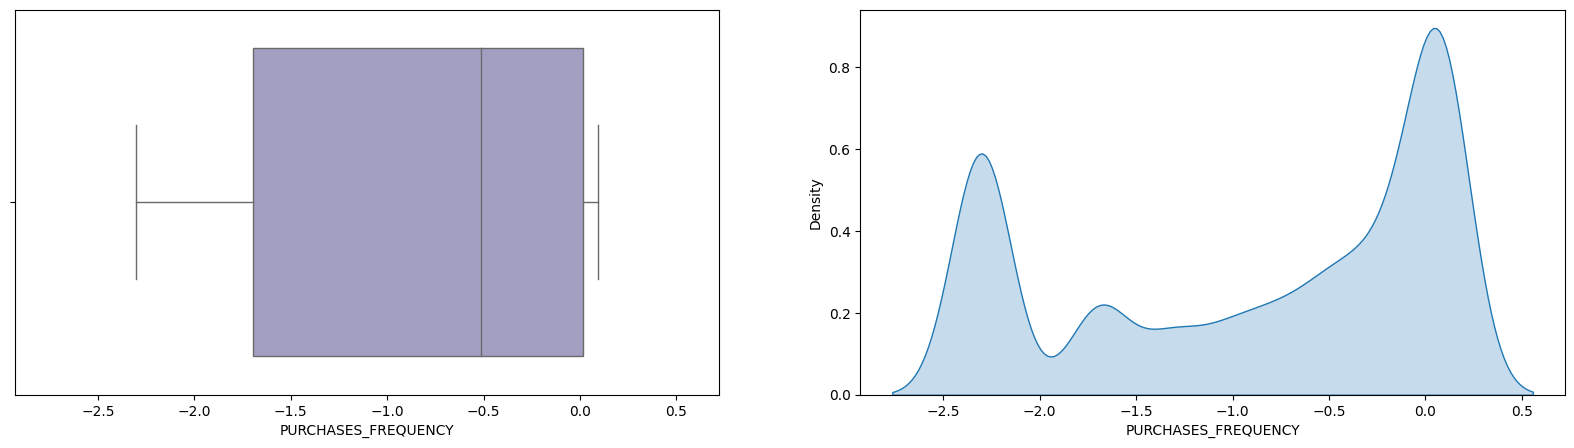

<Figure size 2000x500 with 0 Axes>

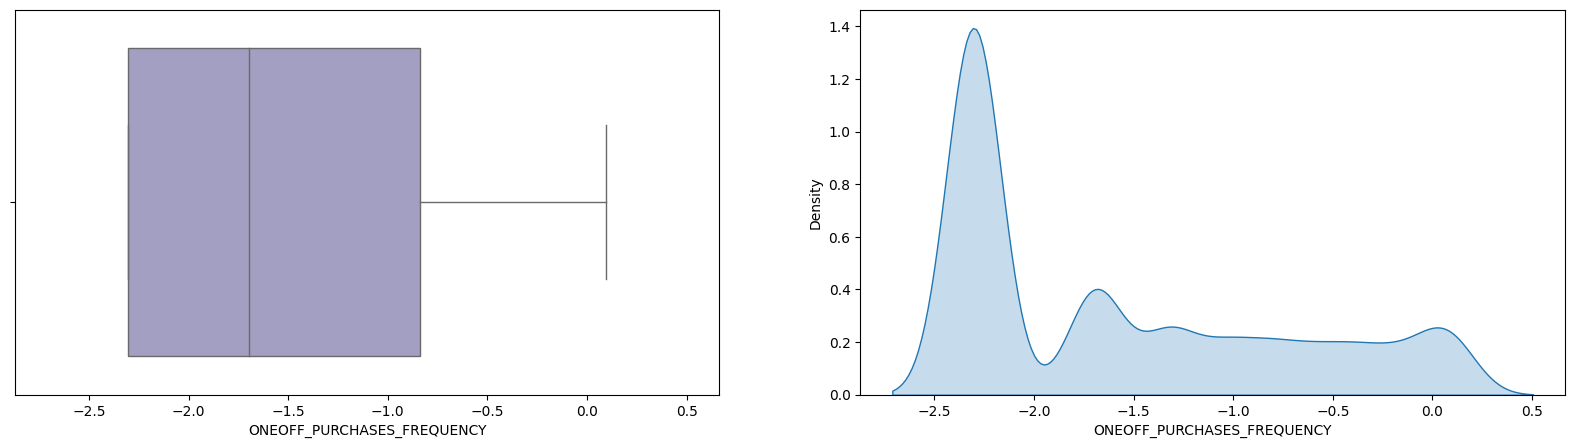

<Figure size 2000x500 with 0 Axes>

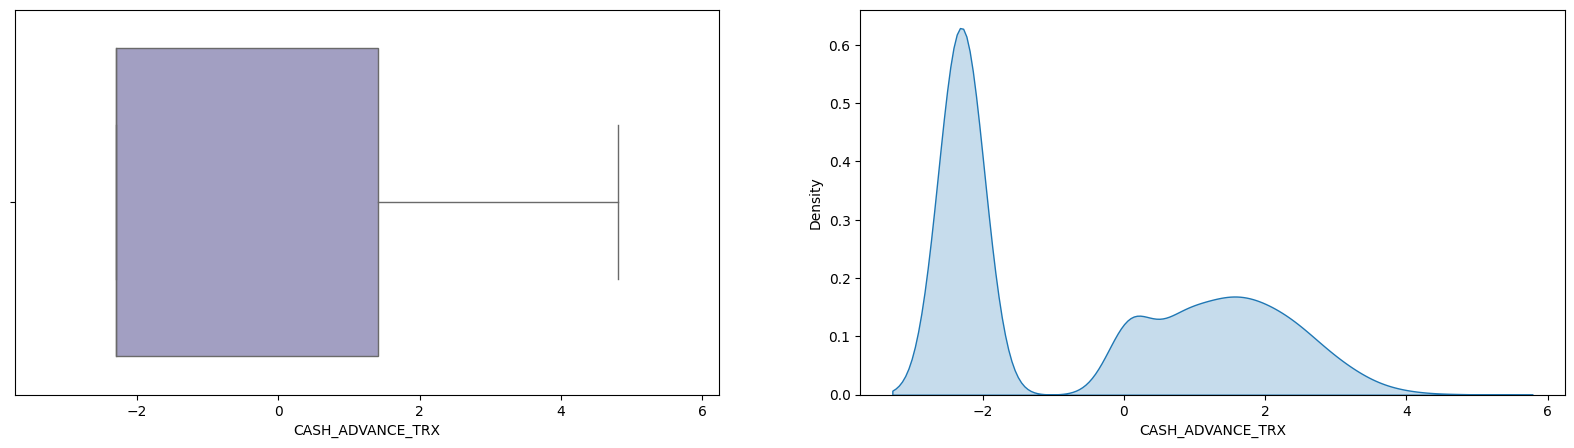

<Figure size 2000x500 with 0 Axes>

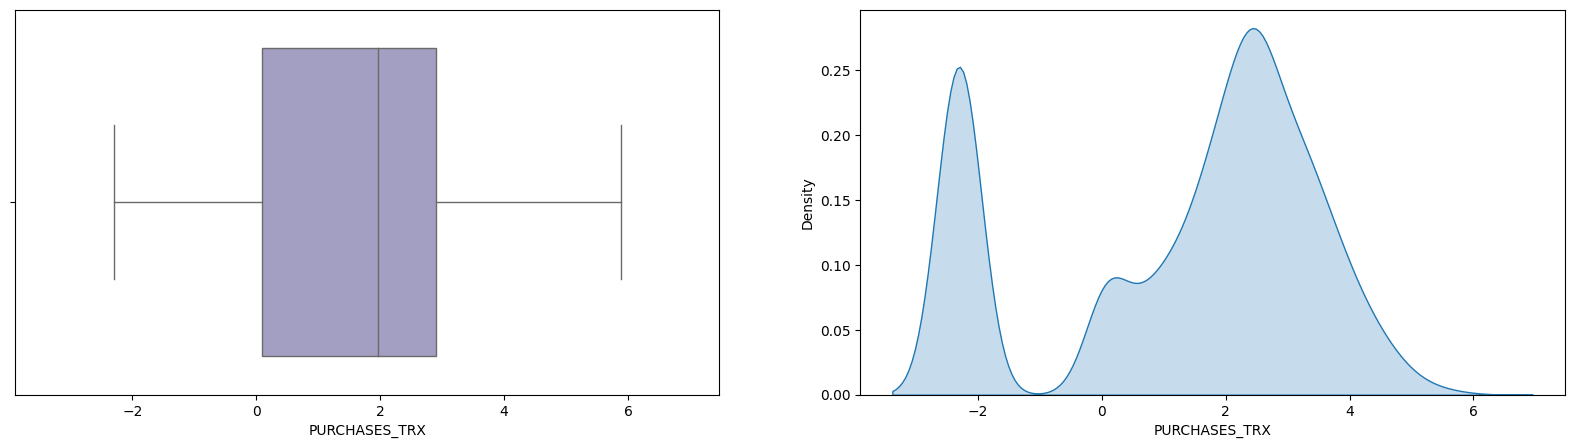

<Figure size 2000x500 with 0 Axes>

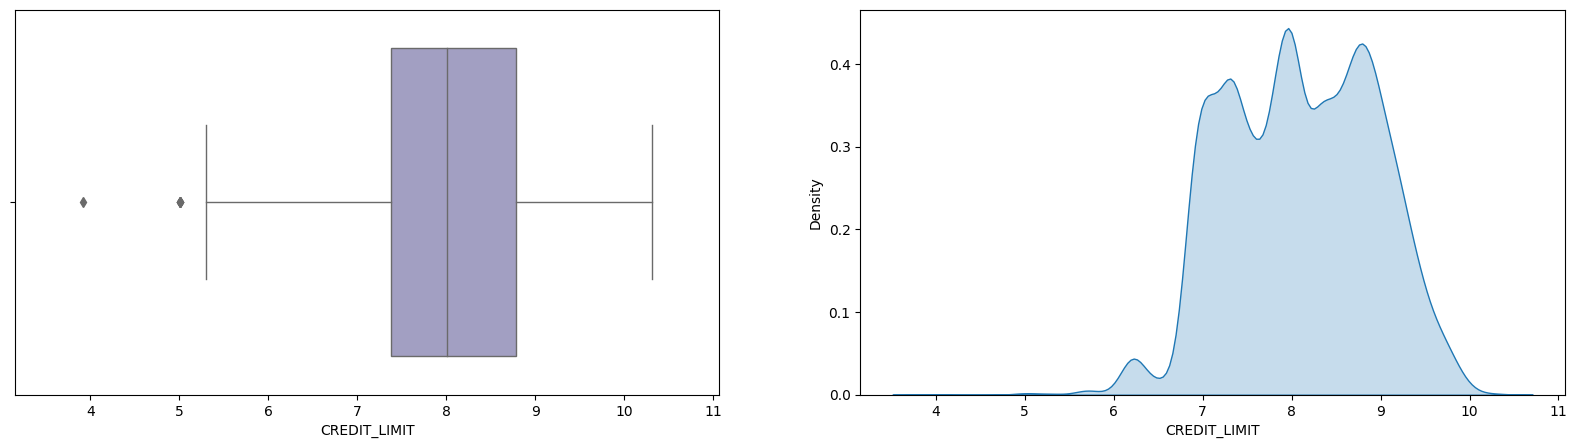

<Figure size 2000x500 with 0 Axes>

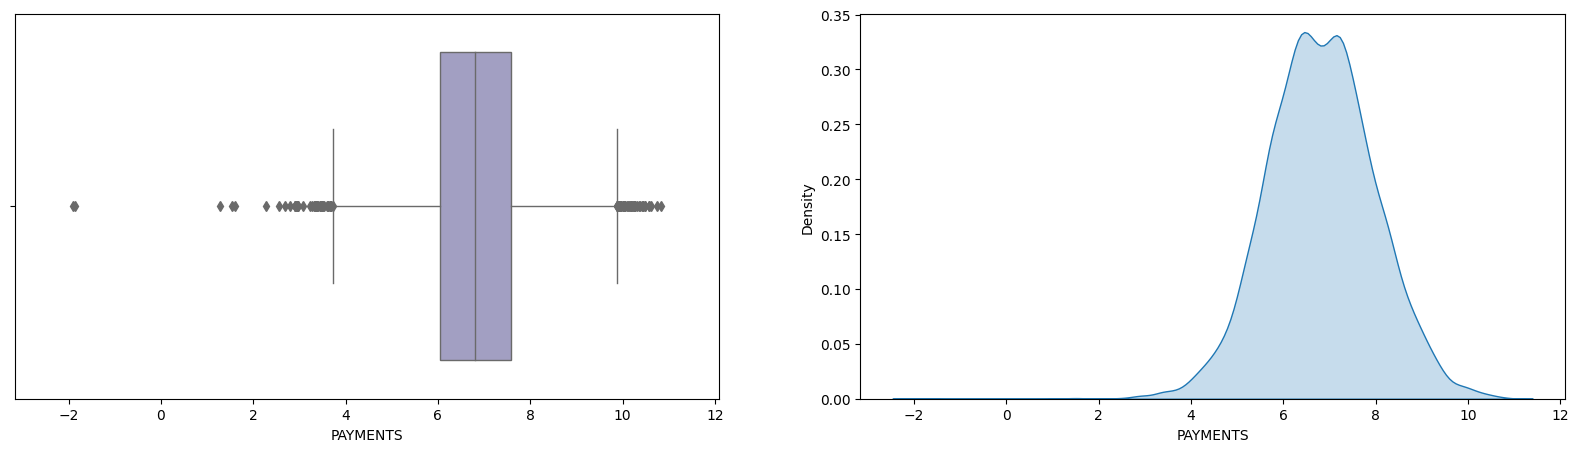

<Figure size 2000x500 with 0 Axes>

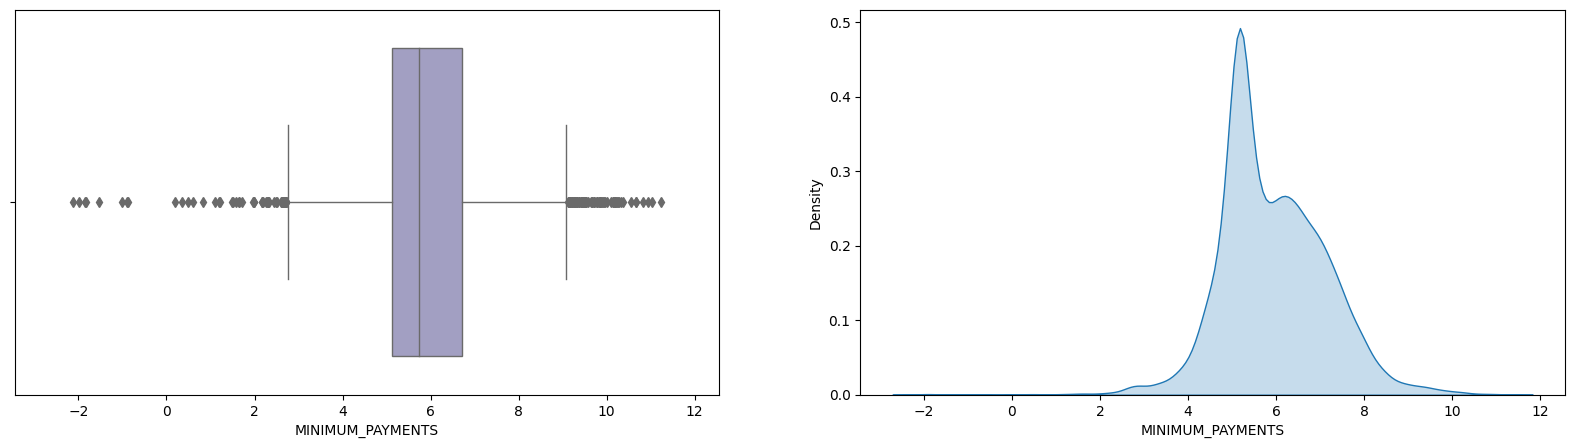

<Figure size 2000x500 with 0 Axes>

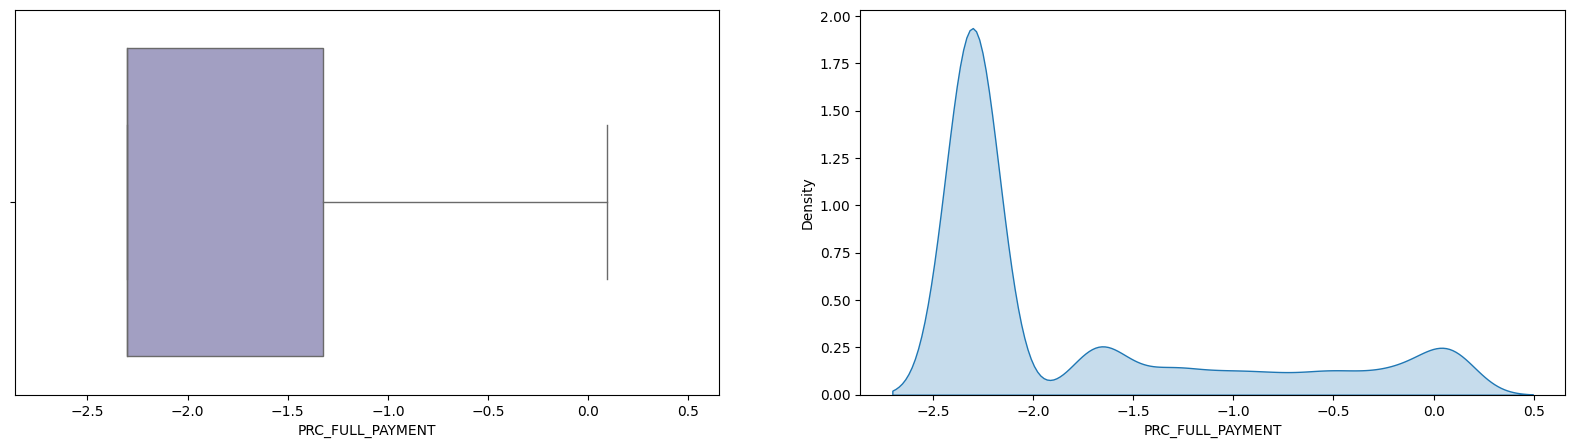

In [76]:
for col in list(df_copy_log.columns):
    if df_copy_log[col].nunique() > 10:
        plt.figure();
        rcParams['figure.figsize'] = (20, 5);
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True);
        plt.gca().set(xlabel=col, ylabel='Density');
        sns.boxplot(x = col, ax=ax_box, linewidth=1.0, palette='Purples', data=df_copy_log);  
        sns.kdeplot(df_copy_log[col], ax=ax_kde, fill=True, palette='Purples');
        plt.show();

#### we see that the skeweness data is solved

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [77]:
from sklearn.cluster import KMeans

### Elbow method

In [79]:
wss = []
K = range(1,11)

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_copy_log)
    # for accuracy of each cluster 
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

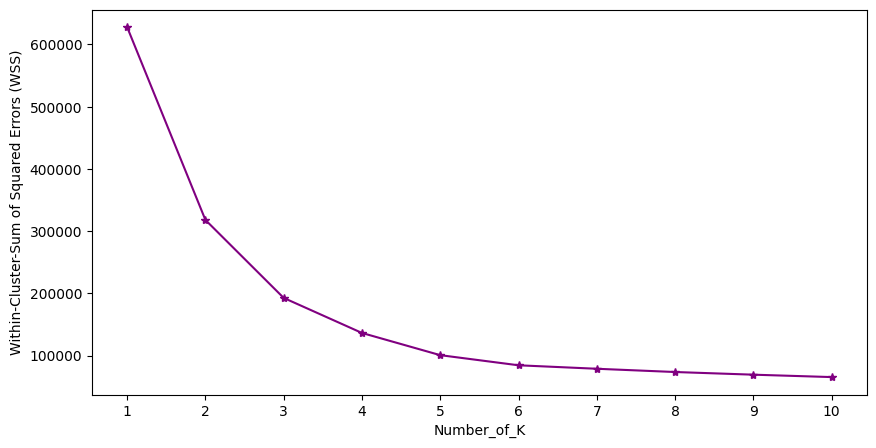

In [80]:
plt.figure(figsize=(10,5))
plt.plot(K,wss, marker = '*',color='purple')
plt.xlabel('Number_of_K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.xticks(range(int(min(K)), int(max(K)) + 1));

## I think the best k will be 5

In [81]:
# Number of clusters (K)
n_clusters = 5

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=n_clusters )

# Fit the model to the scaled data
kmeans.fit(df_copy_log)

KMeans(n_clusters=5)

In [82]:
Clusters = kmeans.labels_
Clusters

array([1, 0, 3, ..., 1, 0, 4], dtype=int32)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.014s...
[t-SNE] Computed neighbors for 8636 samples in 0.683s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.737324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.279007
[t-SNE] KL divergence after 1000 iterations: 1.269164


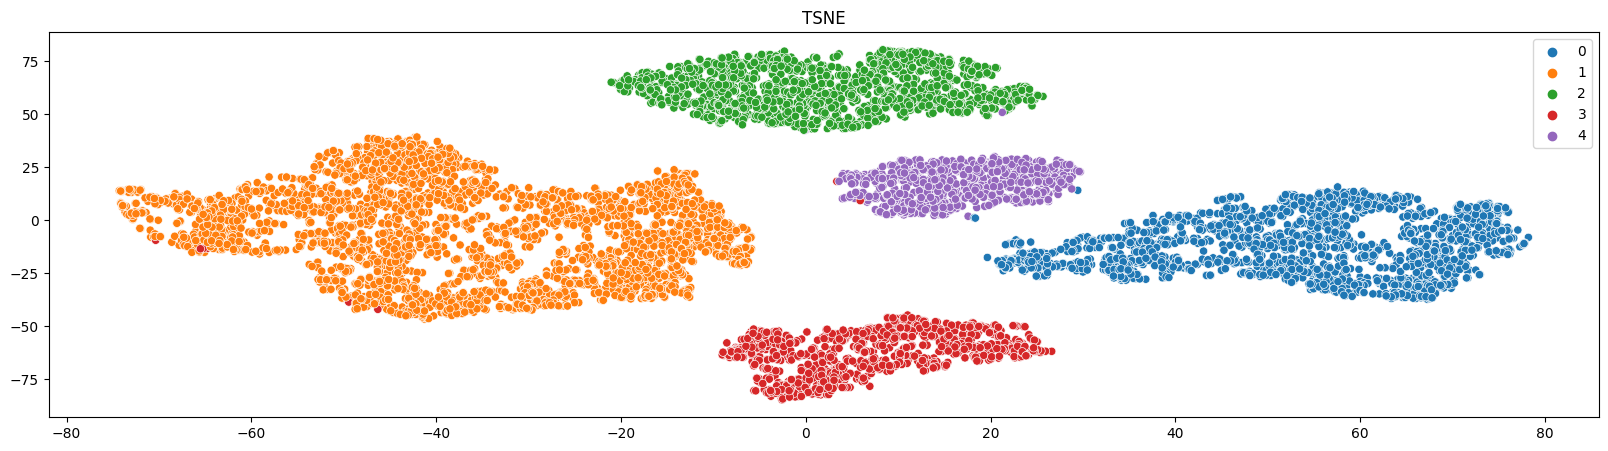

In [83]:
Tsne_=TSNE_2D(df_copy_log,hue=Clusters)

### Applying PCA

In [90]:
pca = PCA(n_components=.95)
pca_result = pca.fit_transform(df_copy_log)

print('Explained variation summation for all components: {}'.format(sum(pca.explained_variance_ratio_)))

Explained variation summation for all components: 0.9541053486551643


In [91]:
pca_result.shape

(8636, 4)

### Elbow Method

In [93]:
wss = []
K = range(1,11)

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_result)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

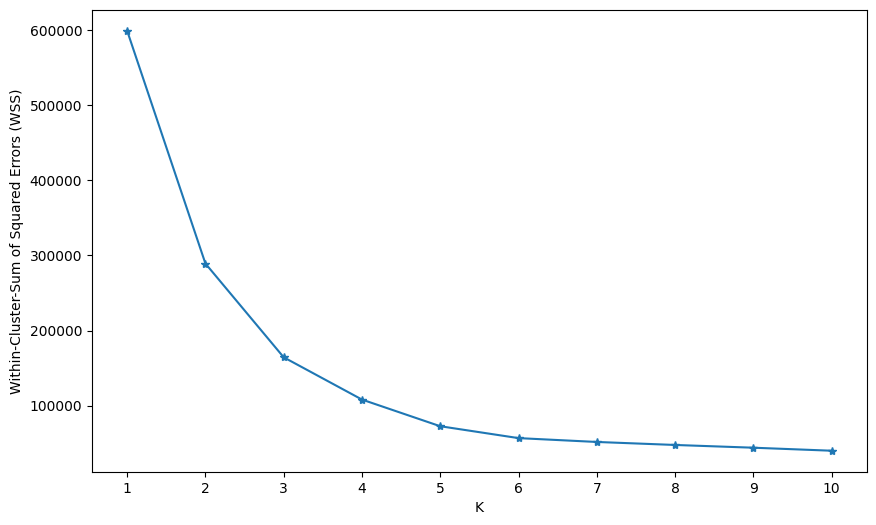

In [95]:
plt.figure(figsize=(10,6))
plt.plot(K,wss, marker = '*')
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.xticks(K);

### The best numbers of clusters is 5

In [96]:
kmeans = KMeans(n_clusters=5,init="k-means++")
kmeans = kmeans.fit(pca_result)

Clusters = kmeans.labels_
Clusters

array([0, 1, 4, ..., 0, 1, 2], dtype=int32)

In [97]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(pca_result)

tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

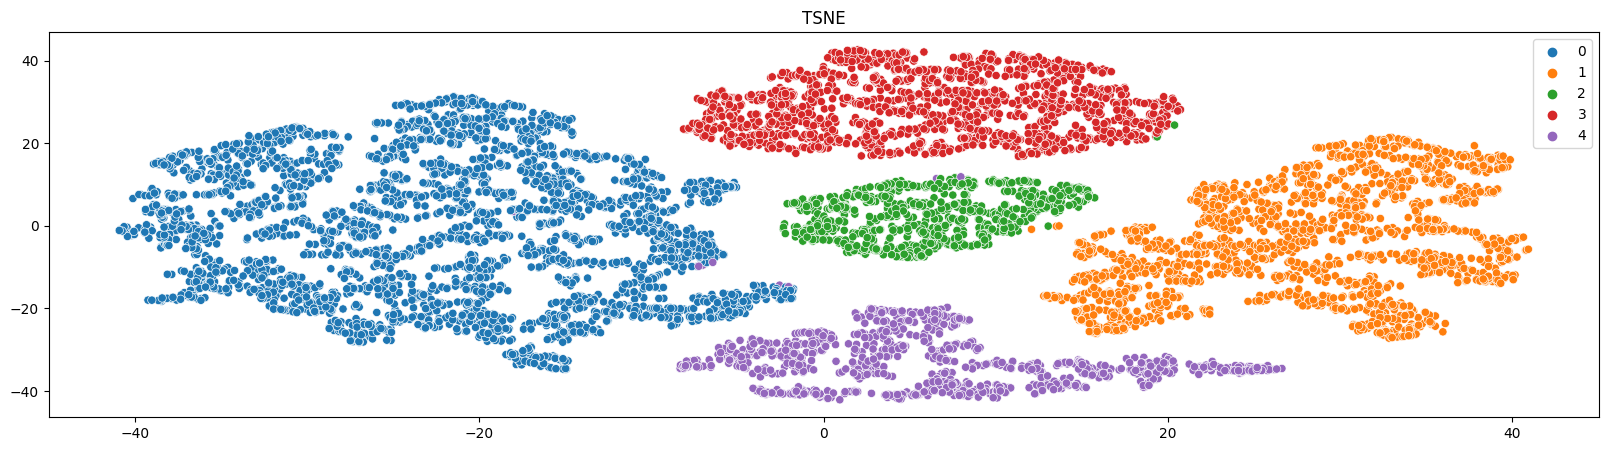

In [98]:
sns.scatterplot(
    x=tsne_2d_one, y=tsne_2d_two,
    hue=Clusters,
    palette="tab10",
    legend="full"
)
plt.title("TSNE");

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.012s...
[t-SNE] Computed neighbors for 8636 samples in 0.688s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.737324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.279076
[t-SNE] KL divergence after 1000 iterations: 1.268760


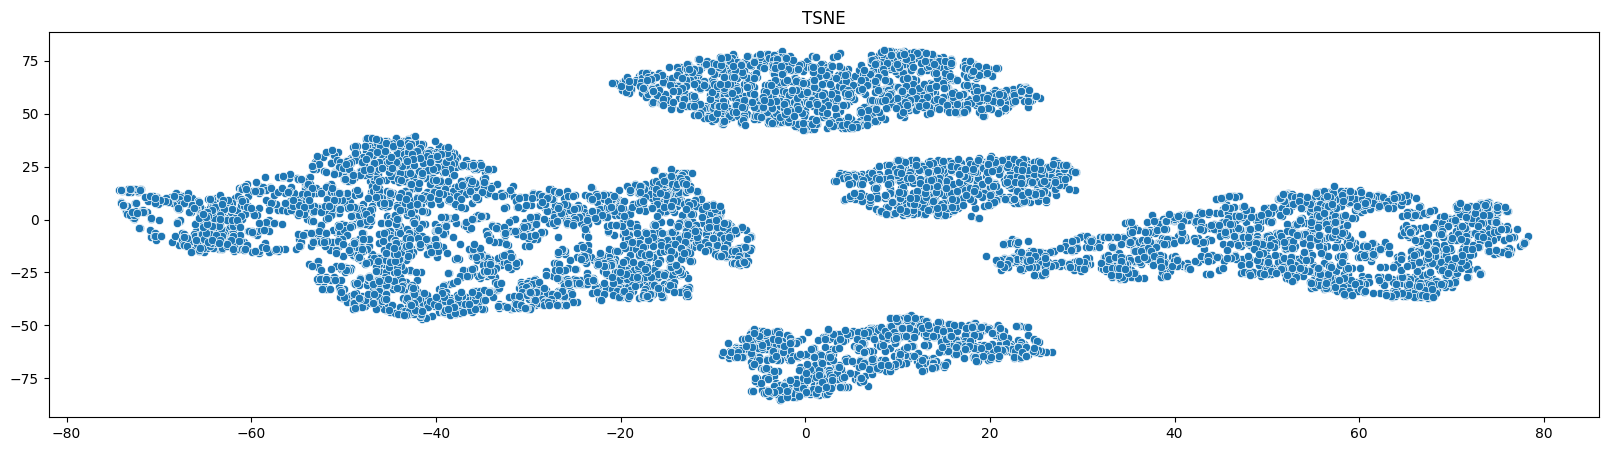

In [100]:
TSNE_2D(df_copy_log)

### herirical clusting

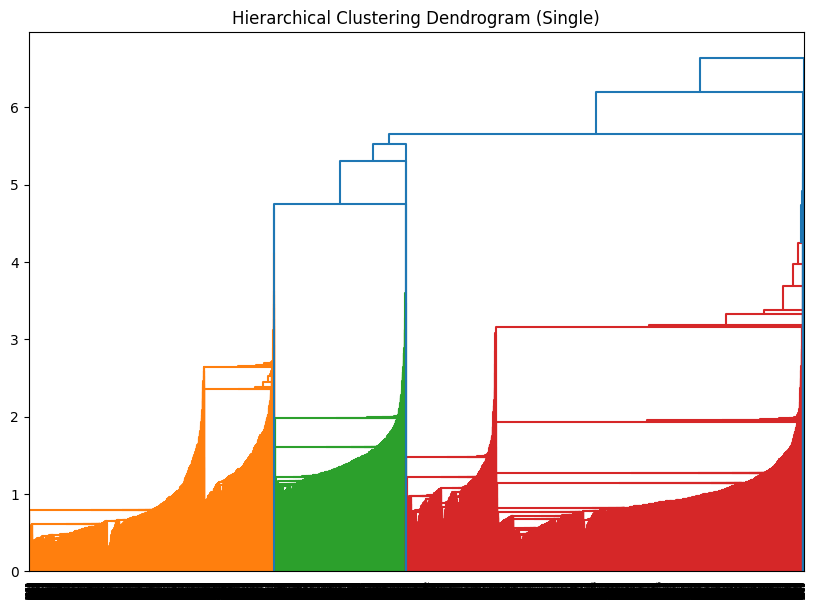

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_copy_log, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.show()

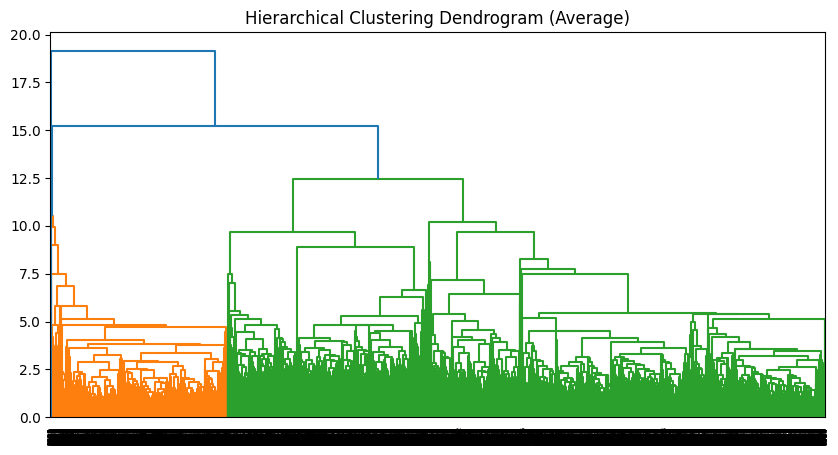

In [102]:
Z = linkage(df_copy_log, 'average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.show()

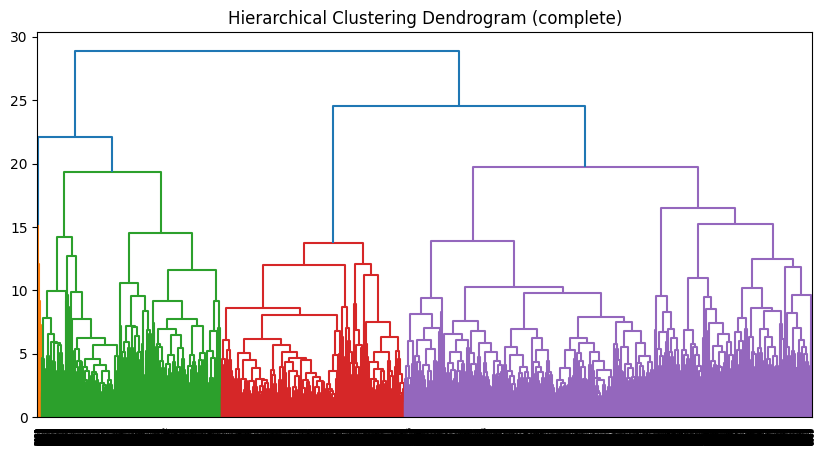

In [103]:
Z = linkage(df_copy_log, 'complete')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (complete)')
plt.show()

In [104]:
# Number of clusters (K)
from sklearn.cluster import AgglomerativeClustering
n_clusters = 5

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(df_copy_log)

AgglomerativeClustering(n_clusters=5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.012s...
[t-SNE] Computed neighbors for 8636 samples in 0.684s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.737324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.280090
[t-SNE] KL divergence after 1000 iterations: 1.269278


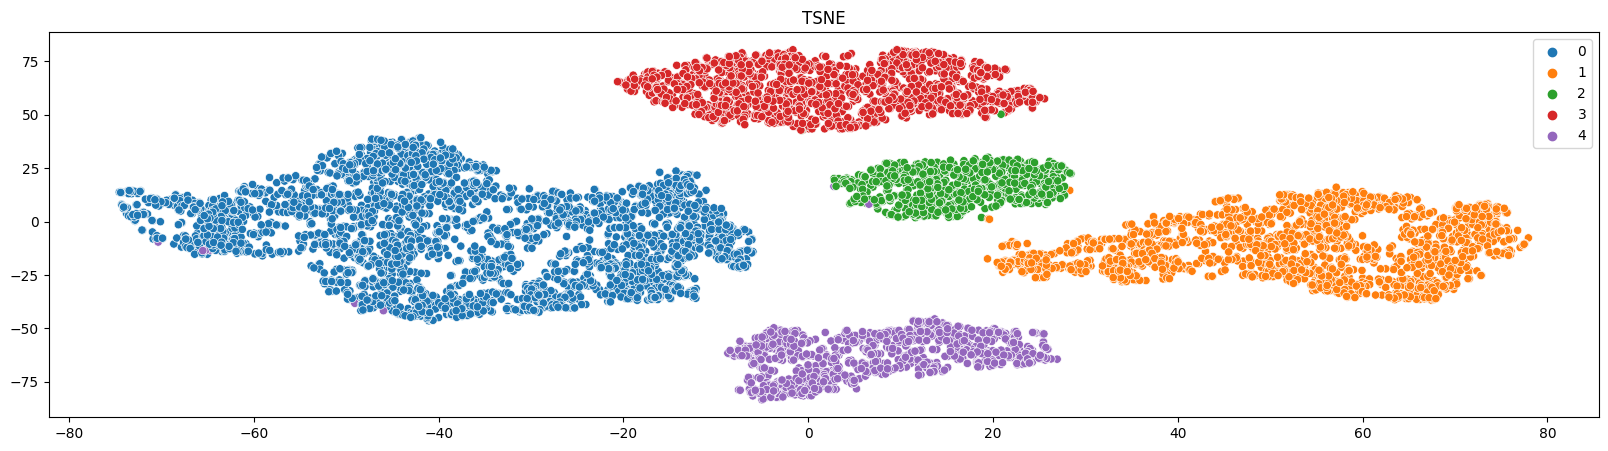

In [105]:
TSNE_2D(df_copy_log,hue=Clusters)

In [136]:
# Number of clusters (K)
from sklearn.cluster import AgglomerativeClustering
n_clusters = 5

# Initialize the AgglomerativeClustering model
hier_model = AgglomerativeClustering(n_clusters=n_clusters,linkage='average',metric='euclidean')
hier_model.fit(df_copy_log)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=5)

In [144]:
clusts_hir=hier_model.fit_predict(df_copy_log)

In [146]:
np.unique(clusts_hir)

array([0, 1, 2, 3, 4])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.013s...
[t-SNE] Computed neighbors for 8636 samples in 0.683s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.737324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.278931
[t-SNE] KL divergence after 1000 iterations: 1.269660


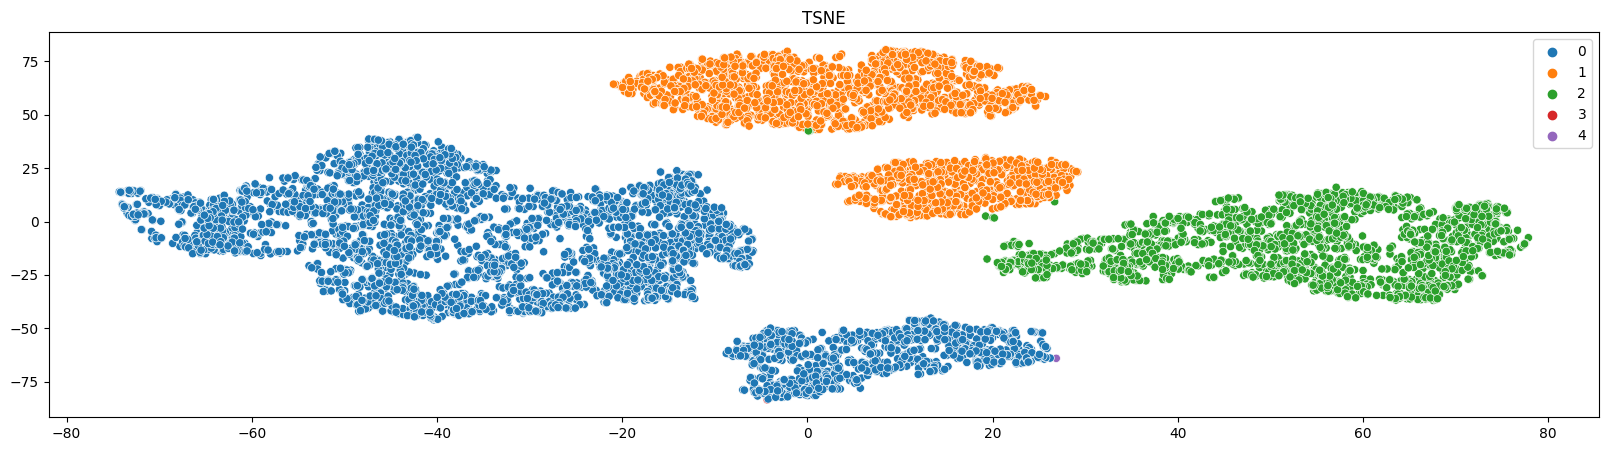

In [147]:
TSNE_2D(df_copy_log,hue=Clusters)

## GaussianMixture

In [106]:
# Number of clusters (K)
from sklearn.mixture import GaussianMixture
n_clusters = 5

# Initialize the GaussianMixture model
gaussian_model = GaussianMixture(n_components=n_clusters,covariance_type='full')
labels_ = gaussian_model.fit_predict(df_copy_log)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.013s...
[t-SNE] Computed neighbors for 8636 samples in 0.692s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.737324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.278931
[t-SNE] KL divergence after 1000 iterations: 1.269660


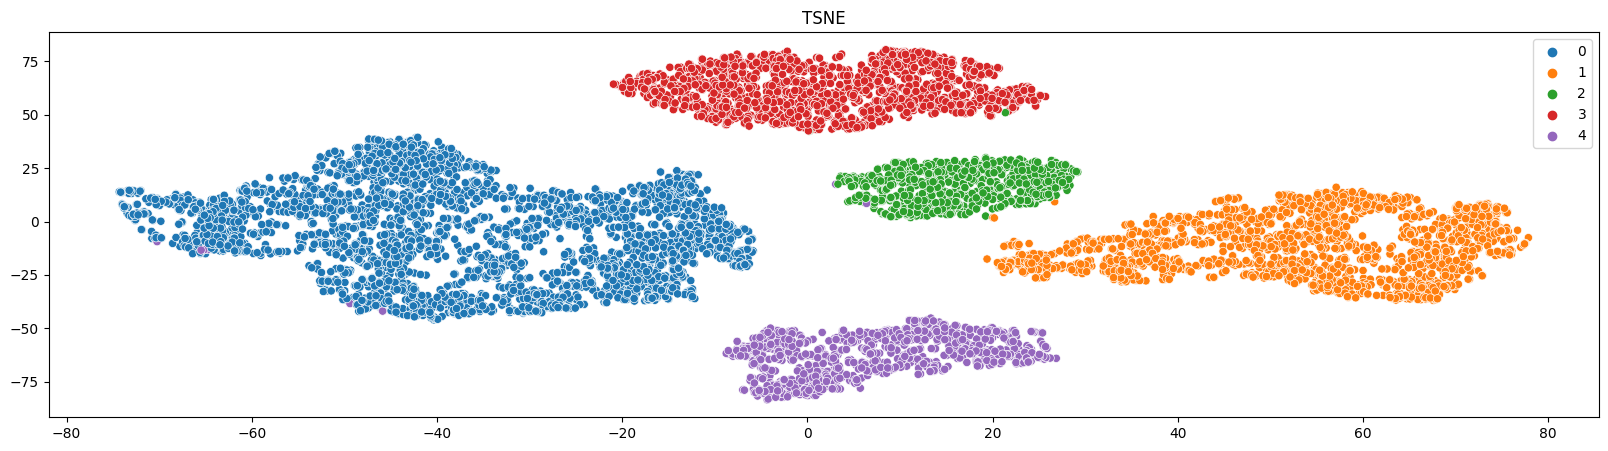

In [107]:
TSNE_2D(df_copy_log,hue=Clusters)

## DBSCAN

In [127]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=50)
labels = dbscan.fit_predict(df_copy_log)
labels

array([0, 1, 2, ..., 0, 1, 4])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8636 samples in 0.012s...
[t-SNE] Computed neighbors for 8636 samples in 0.685s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8636
[t-SNE] Computed conditional probabilities for sample 2000 / 8636
[t-SNE] Computed conditional probabilities for sample 3000 / 8636
[t-SNE] Computed conditional probabilities for sample 4000 / 8636
[t-SNE] Computed conditional probabilities for sample 5000 / 8636
[t-SNE] Computed conditional probabilities for sample 6000 / 8636
[t-SNE] Computed conditional probabilities for sample 7000 / 8636
[t-SNE] Computed conditional probabilities for sample 8000 / 8636
[t-SNE] Computed conditional probabilities for sample 8636 / 8636
[t-SNE] Mean sigma: 0.737324
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.278931
[t-SNE] KL divergence after 1000 iterations: 1.269660


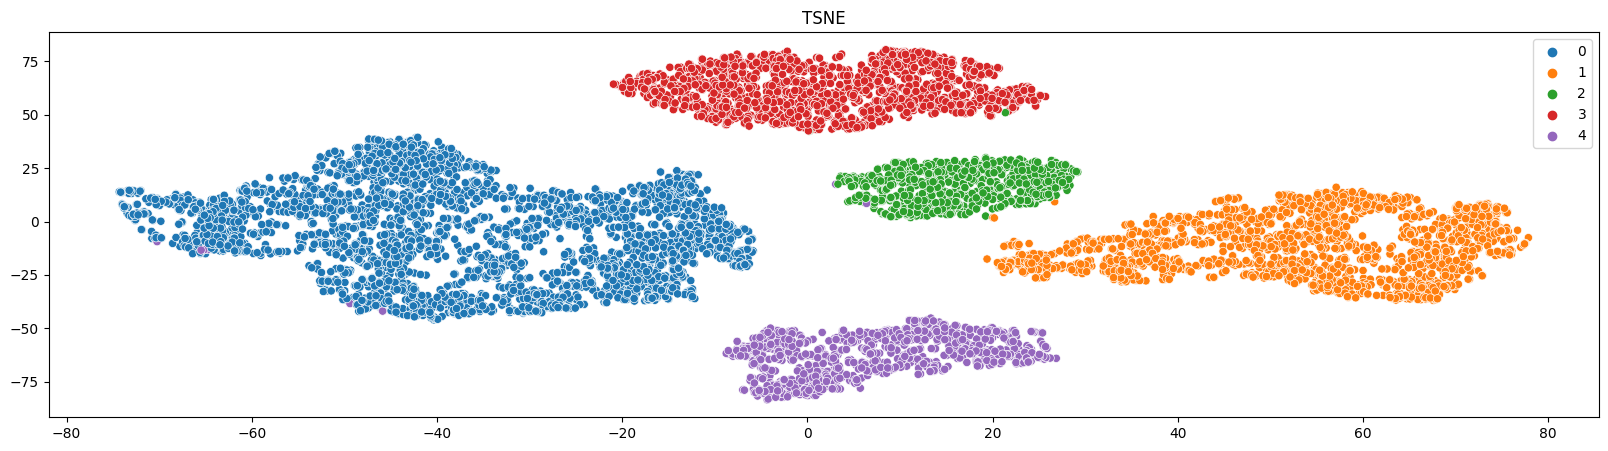

In [128]:
TSNE_2D(df_copy_log, hue=Clusters)


#### From the algorithms provided, it appears that Hierarchical Clustering has been identified as the most effective model for clustering customers. Now, the next step involves uncovering the business implications associated with each cluster.

In [129]:
df_final = df.copy()
df_final.dropna(inplace=True)
df_final['Cluster'] = hier_model.labels_

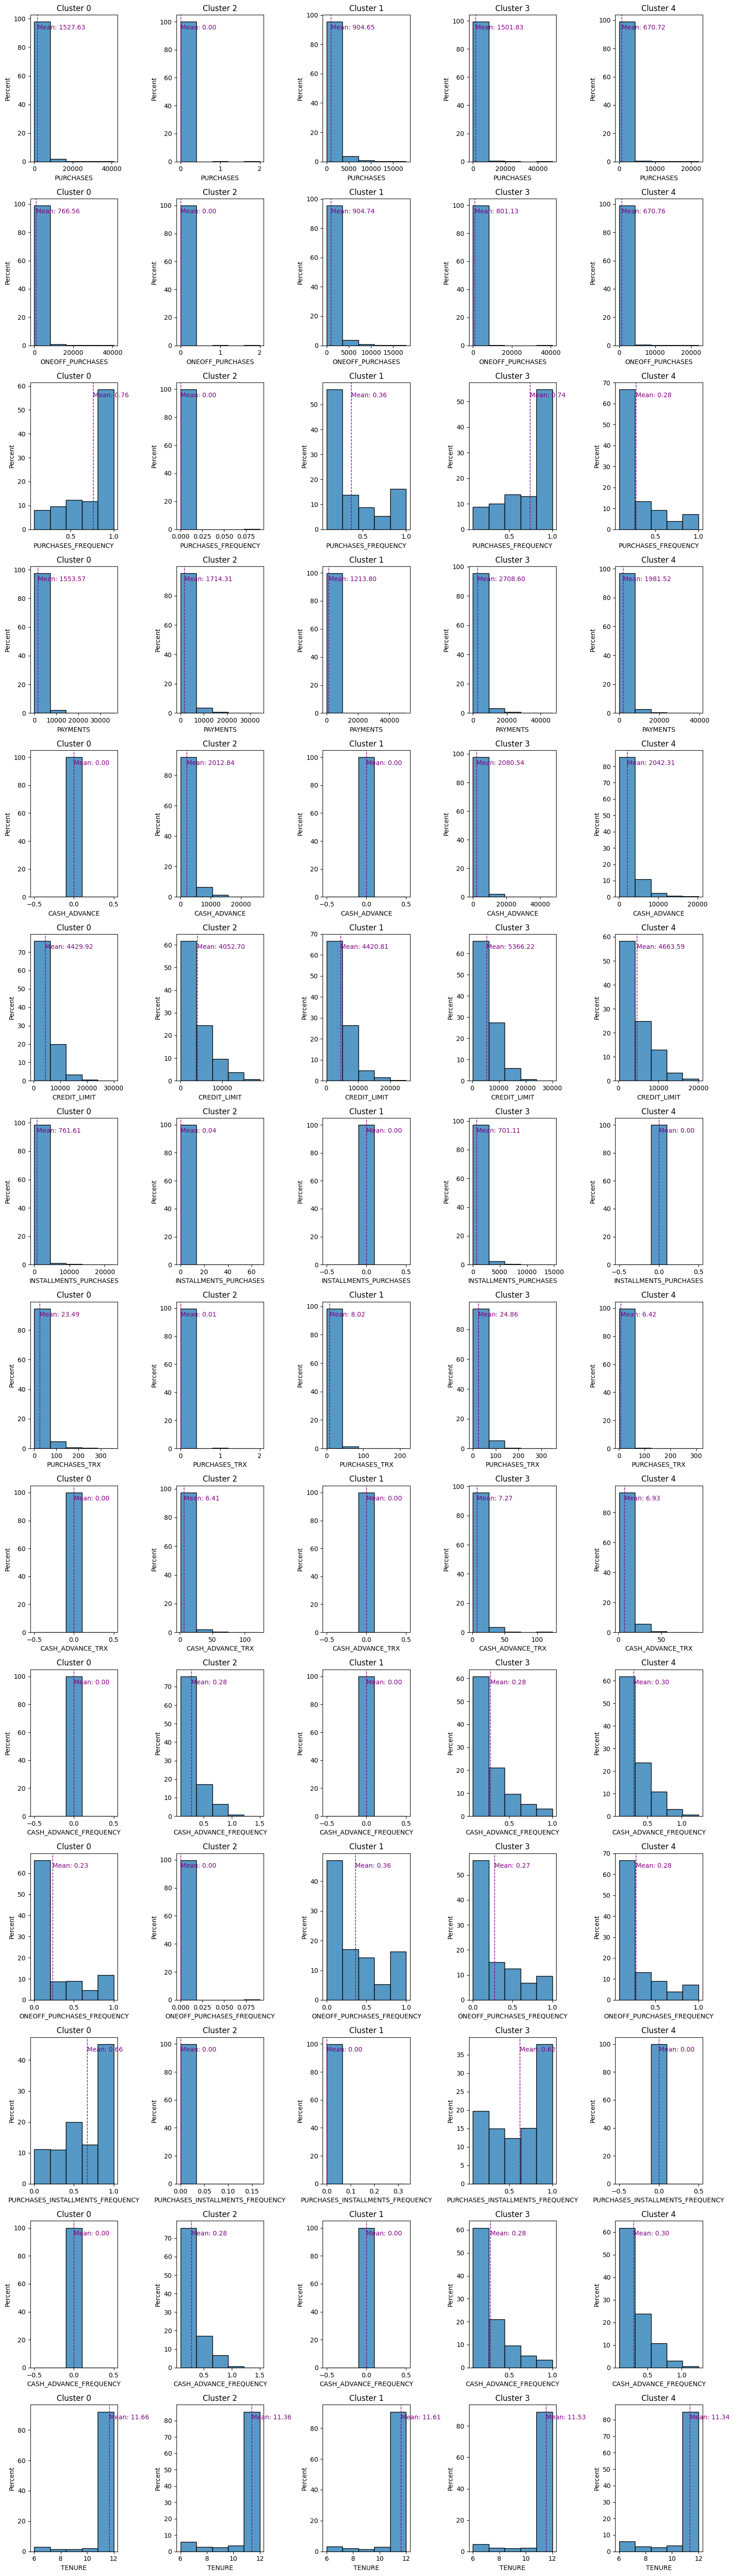

In [134]:
# Define the columns and clusters
cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']
clusters = df_final['Cluster'].unique()

# Set up subplots
num_rows = len(cols)
num_cols = len(clusters)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Loop through each feature
for i, col in enumerate(cols):
    # Loop through each cluster
    for j, cluster in enumerate(clusters):
        # Select data points belonging to the current cluster
        data = df_final[df_final['Cluster'] == cluster][col]
        # Plot histogram for the current cluster in the current subplot
        sns.histplot(data, bins=5, ax=axes[i, j], stat='percent')
        axes[i, j].set_title(f'Cluster {cluster}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Percent')
        
        # Calculate mean
        mean_value = np.mean(data)
        # Annotate with mean value
        axes[i, j].axvline(mean_value, color='purple', linestyle='--', linewidth=1)
        axes[i, j].text(mean_value, axes[i, j].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='purple')

# Adjust layout
plt.tight_layout()
plt.show()


In [135]:
df_final.groupby('Cluster')[cols].mean()

PURCHASES  ONEOFF_PURCHASES  PURCHASES_FREQUENCY     PAYMENTS  \
Cluster                                                                    
0        1527.633094        766.563681             0.764743  1553.572910   
1         904.646507        904.739970             0.363002  1213.801858   
2           0.002064          0.002064             0.000257  1714.306674   
3        1501.831313        801.131614             0.740781  2708.601191   
4         670.719546        670.764578             0.278989  1981.522056   

         CASH_ADVANCE  CREDIT_LIMIT  INSTALLMENTS_PURCHASES  PURCHASES_TRX  \
Cluster                                                                      
0            0.000000   4429.922709              761.613800      23.487449   
1            0.000000   4420.806573                0.000000       8.017910   
2         2012.841754   4052.696078                0.044092       0.005071   
3         2080.542106   5366.218270              701.114172      24.858413   
4         2042.312994   4663.585662                0.000000       6.417639   

         CASH_ADVANCE_TRX  CASH_ADVANCE_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Cluster                                                                         
0                0.000000                0.000000                    0.233291   
1                0.000000                0.000000                    0.362339   
2                6.410243                0.276703                    0.000257   
3                7.273598                0.282638                    0.273117   
4                6.931258                0.297634                    0.278881   

         PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY     TENURE  
Cluster                                                                       
0                                0.663757                0.000000  11.658202  
1                                0.000332                0.000000  11.608955  
2                                0.000127                0.276703  11.360548  
3                                0.622789                0.282638  11.528728  
4                                0.000000                0.297634  11.342412

## Businees Defination for each Clusters 

### `Cluster 0`

### Customer Behavior :
 - Customers in Cluster 0 prefer for making purchases in installments rather than for cash advances.
 
### Purchase Behavior:
- The mean amount of purchases made in installments is \$761.84, indicating a significant portion of their spending occurs through installment payments.
- These customers tend to make a high number of purchase transactions, with a mean of approximately 23 transactions.
- Around 76\% of customers in this cluster exhibit frequent purchase behavior, indicating a consistent spending pattern.
- The mean amount of total purchases is \$1528, suggesting that while purchases are frequent, they are moderate in size.
 



## `Cluster 1`

### Customer Behavior :
 - Customers in Cluster 1 exhibit a preference for making one-off purchases rather than opting for installment payments.

### Purchase Behavior:
- The majority of purchases made by customers in this cluster are one-off transactions, indicating a tendency towards lump-sum spending.
- Customers in this cluster generally avoid purchases in installments, suggesting a preference for immediate payment rather than spreading payments over time.
- The number of purchase transactions is relatively lower compared to other clusters, with a mean of approximately 8 transactions.
- Around 36% of customers in this cluster demonstrate frequent purchase behavior, indicating a moderate level of spending activity.
- The mean amount of total purchases is \$903, reflecting the tendency for one-off purchases with a moderate spending amount.


## `Cluster 2` :

### Customer Behavior :
 - Customers in Cluster 2 demonstrate a preference for using cash advances rather than making purchases in installments.

### Purchase Behavior:
 - The majority of purchases made by customers in this cluster are through cash advances, indicating a reliance on immediate funds rather than installment payments.
 - None of the customers in this cluster demonstrate frequent purchase behavior, suggesting a preference for infrequent or one-time spending.

### Cash Advance:
- The mean amount of cash advances taken by customers in this cluster is $2011. This suggests that, on average, customers in Cluster 2 rely on relatively large cash advances to meet their immediate financial needs. It indicates a pattern of substantial cash flow requirements or perhaps unexpected expenses among this group of customers.

## `Cluster 3`
### Customer Behavior :
 - Customers in Cluster 3 demonstrate a preference for making purchases both in installments and through cash advances.

### Purchase Behavior:
 - The mean amount of purchases made in installments is \$701.84, indicating a significant portion of their spending occurs through installment payments.
 - These customers tend to make a high number of purchase transactions, with a mean of approximately 25 transactions.
 - Around 74% of customers in this cluster exhibit frequent purchase behavior, indicating a consistent spending pattern.
 - The mean amount of total purchases is $1501, suggesting that while purchases are frequent, they are moderate in size.
 
### Cash Advance:
 - The mean amount of cash advances taken by customers in this cluster is \$2080.54, suggesting a reliance on immediate funds for their purchases.

## `Cluster 4`
### Customer Behavior :
 - Customers in Cluster 4 demonstrate a preference for using cash advances rather than making purchases in installments.
 
### Purchase Behavior:
 - The mean amount of purchases made by customers in this cluster is \$669, indicating a moderate level of spending on purchases.
 - Customers in this cluster tend to make fewer purchase transactions, with a mean of approximately 6 transactions.
 - Around 27\% of customers in this cluster exhibit frequent purchase behavior, suggesting a preference for infrequent spending or one-time purchases.
 
### Cash Advance:
- The mean amount of cash advances taken by customers in this cluster is \$2046.54. This suggests that customers in Cluster 4 rely heavily on cash advances to meet their financial needs, indicating potential financial instability or unexpected expenses among this group of customers.

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [157]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Counters Dendograms")
# dend = shc.dendrogram(shc.linkage(y=... , method=...,metric=...),orientation='right') #fill y with your dataframe
#                                                                                       #and method with linkage criteria
#                                                                                       #and metric with distance function

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 